#### **ANALYSIS OF PREVIOUS APPLICATIONS DATASETS** ####

In this notebook we will analyze the datasets related to previous applications. The goal is to understand the characteristics of the data, identify any patterns or trends, and prepare it for further analysis and modeling.

There we will explore those datasets:
- `previous_application.csv`: This dataset contains information about previous loan applications made by clients. It includes details such as the type of loan, the amount requested, the status of the application, and other relevant features.
- `installments_payments.csv`: This dataset contains information about the installment payments made by clients for their previous loans. It includes details such as the amount paid, the date of payment, and any delays in payment.
- `credit_card_balance.csv`: This dataset contains information about the credit card balances of clients. It includes details such as the balance amount, credit limit, and payment history.
- `pos_cash_balance.csv`: This dataset contains information about the point-of-sale (POS) cash balances of clients. It includes details such as the balance amount, credit limit, and payment history.

Now we will start by importing the necessary libraries and loading the datasets. For the analysis we will use DuckDB to efficiently handle and query the data with SQL.

In [1]:
import os
import sys
from functools import partial

import duckdb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter

sys.path.append(os.path.abspath(".."))
from utils import utils
from utils.plot_style import set_notebook_style

set_notebook_style()

In [2]:
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", 50)
pd.set_option("future.no_silent_downcasting", True)

In [3]:
con = duckdb.connect()

con.execute(
    """
    CREATE OR REPLACE VIEW prev_application AS 
    SELECT * FROM '../data/previous_application.parquet'
"""
);

In [4]:
con.execute(
    """
    CREATE OR REPLACE VIEW cash_loans AS 
    SELECT * FROM '../data/POS_CASH_balance.parquet'
"""
);

In [5]:
con.execute(
    """
    CREATE OR REPLACE VIEW payments AS 
    SELECT * FROM '../data/installments_payments.parquet'
"""
);

In [6]:
con.execute(
    """
    CREATE OR REPLACE VIEW credit_cards AS 
    SELECT * FROM '../data/credit_card_balance.parquet'
"""
);

After creating views for each dataset, we will convert them into Pandas DataFrames for further analysis and visualization. We will explore shapes of the datasets, and display sample records to get an initial understanding of the data together with descriptions of the columns.

In [7]:
prev_applic_overview = con.execute(
    """
    SELECT *
    FROM prev_application
"""
).df()

prev_applic_overview.head(3)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,None,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


In [8]:
cash_loans_overview = con.execute(
    """SELECT * FROM 
            cash_loans
            """
).df()

cash_loans_overview.head(3)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0


In [9]:
payments_overview = con.execute(
    """
    SELECT *
    FROM payments
"""
).df()

payments_overview.head(3)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000


In [10]:
cred_cards_overview = con.execute(
    """
    SELECT *
    FROM credit_cards
"""
).df()

cred_cards_overview.head(3)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0


In [11]:
description = pd.read_csv(
    "../data/HomeCredit_columns_description.csv", encoding="ISO-8859-1", index_col=0
)
description[description["Table"].str.startswith("previous_")]

,Table,Row,Description,Special
176,previous_application.csv,SK_ID_PREV,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit)",hashed
177,previous_application.csv,SK_ID_CURR,ID of loan in our sample,hashed
178,previous_application.csv,NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application",NaN
179,previous_application.csv,AMT_ANNUITY,Annuity of previous application,NaN
180,previous_application.csv,AMT_APPLICATION,For how much credit did client ask on the previous application,NaN
181,previous_application.csv,AMT_CREDIT,"Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT",NaN
182,previous_application.csv,AMT_DOWN_PAYMENT,Down payment on the previous application,NaN
183,previous_application.csv,AMT_GOODS_PRICE,Goods price of good that client asked for (if applicable) on the previous application,NaN
184,previous_application.csv,WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply for previous application,NaN
185,previous_application.csv,HOUR_APPR_PROCESS_START,Approximately at what day hour did the client apply for the previous application,rounded


In [12]:
description[description["Table"].str.startswith(("POS_", "installments", "credit_"))]

,Table,Row,Description,Special
145,POS_CASH_balance.csv,SK_ID_PREV,"ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)",NaN
146,POS_CASH_balance.csv,SK_ID_CURR,ID of loan in our sample,NaN
147,POS_CASH_balance.csv,MONTHS_BALANCE,"Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )",time only relative to the application
148,POS_CASH_balance.csv,CNT_INSTALMENT,Term of previous credit (can change over time),NaN
149,POS_CASH_balance.csv,CNT_INSTALMENT_FUTURE,Installments left to pay on the previous credit,NaN
150,POS_CASH_balance.csv,NAME_CONTRACT_STATUS,Contract status during the month,NaN
151,POS_CASH_balance.csv,SK_DPD,DPD (days past due) during the month of previous credit,NaN
152,POS_CASH_balance.csv,SK_DPD_DEF,DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit,NaN
153,credit_card_balance.csv,SK_ID_PREV,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)",hashed
154,credit_card_balance.csv,SK_ID_CURR,ID of loan in our sample,hashed


In [13]:
print(
    "The shapes of the previous application, payments, credit cards and cash loans datasets are as follows:"
)
prev_applic_overview.shape, payments_overview.shape, cred_cards_overview.shape, cash_loans_overview.shape

The shapes of the previous application, payments, credit cards and cash loans datasets are as follows:


((1670214, 37), (13605401, 8), (3840312, 23), (10001358, 8))

We see that payments and cash loans tables have a lot of records, respectively 13M and 10M, while previous applications (1.7M) and credit card balances (3.8M) have fewer records, but more features.

Below we check distinct SK_ID_PREV AND SK_ID_CURR values for the payments dataset, having the highest number of records from all the datasets. We see that for nearly one current application there are about 3 previous applications.

In [14]:
con.execute(
    """SELECT 
                COUNT(DISTINCT SK_ID_PREV) as num_prev_appl, 
                COUNT(DISTINCT SK_ID_CURR) as num_curr_appl
            FROM payments
            """
).df()

,num_prev_appl,num_curr_appl
0,997752,339587


##### **INSTALLMENTS** #####

First we will explore installment payments dataset - descriptive statistics, and missing values.

In [15]:
payments_overview.drop(columns=["SK_ID_PREV", "SK_ID_CURR"]).describe()

,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


From the table above we see that installment number varies from 1 to 277, with median at 8. Amount of installment seems to have a very similar distribution to the amount paid, with mean, standard deviation and median being very close. However, days of the payment though having very similar distribution, have a larger difference between minimum values.

In [16]:
payments_overview.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

We see that DAYS_ENTRY_PAYMENT and AMT_PAYMENT have some missing values. We will investigate further to understand the reason for these missing values.

In [17]:
payments_overview[payments_overview.DAYS_ENTRY_PAYMENT.isnull()].head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
3764207,1531600,103793,1.0,7,-668.0,NaN,49741.020,NaN
3764208,1947105,159974,1.0,24,-36.0,NaN,22849.515,NaN
3764209,1843773,167270,1.0,22,-20.0,NaN,48092.355,NaN
3764210,1691592,192536,1.0,5,-2561.0,NaN,7675.425,NaN
3764211,1531299,157088,0.0,11,-1847.0,NaN,67.500,NaN


We can infer that since there was no payment made, the DAYS_ENTRY_PAYMENT and AMT_PAYMENT are missing. So we will fill AMT_PAYMENT missing values with 0.

In [18]:
payments_overview["AMT_PAYMENT"] = payments_overview["AMT_PAYMENT"].fillna(0)

Further we will explore each feature in more detail to understand their distributions and spot any anomalies.

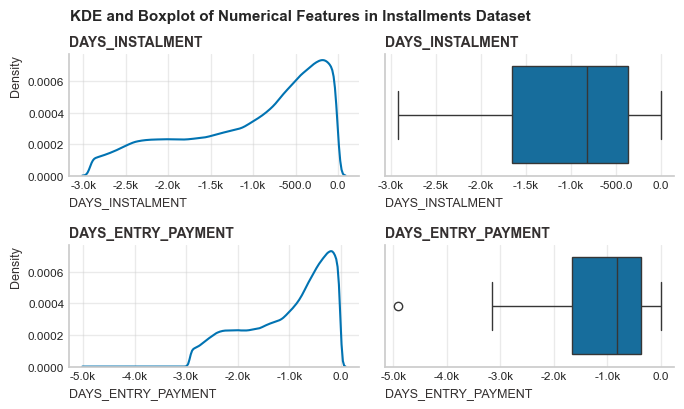

Missing Value Summary:
DAYS_INSTALMENT: 0 missing
DAYS_ENTRY_PAYMENT: 2905 missing


,count,mean,std,min,25%,50%,75%,max
DAYS_INSTALMENT,"13,605,401.0","-1,042.3",800.9,"-2,922.0","-1,654.0",-818.0,-361.0,-1.0
DAYS_ENTRY_PAYMENT,"13,602,496.0","-1,051.1",800.6,"-4,921.0","-1,662.0",-827.0,-370.0,-1.0


In [19]:
utils.get_distribution_plots_with_stat(
    payments_overview,
    ["DAYS_INSTALMENT", "DAYS_ENTRY_PAYMENT"],
    right=0.44,
    top=1.02,
    name="Installments",
)

In [20]:
payments_overview[payments_overview.DAYS_ENTRY_PAYMENT.lt(-3500)]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
11943247,1752167,447329,3.0,7,-1732.0,-4921.0,11401.335,11401.335


We have discovered that DAYS_ENTRY_PAYMENT of -4.9k seems abnormal, we won't delete this record, but we will cap it to the 0.1st percentile to avoid any negative impact on the analysis.

In [21]:
payments_overview = utils.winsorize_features(
    payments_overview, ["DAYS_ENTRY_PAYMENT"], lower=0.001
)

Additionally, we will make additional features to capture payment behavior.

In [22]:
payments_overview["DAYS_INSTALMENT_PAYMENT_DIFF"] = (
    payments_overview.DAYS_INSTALMENT - payments_overview.DAYS_ENTRY_PAYMENT
)
payments_overview["DAYS_INSTALMENT_PAYMENT_DIFF_RATIO"] = (
    payments_overview.DAYS_INSTALMENT_PAYMENT_DIFF / payments_overview.DAYS_INSTALMENT
)

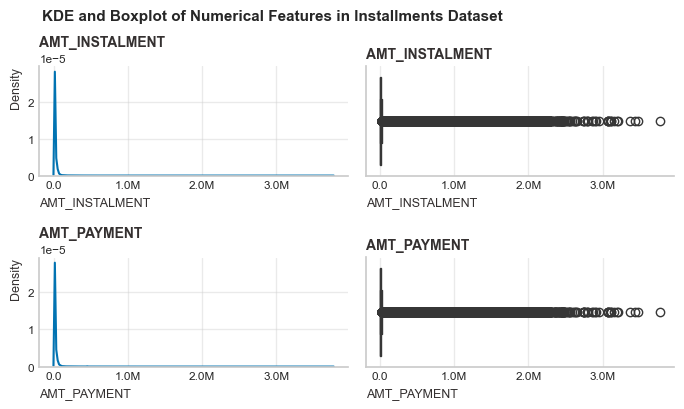

Missing Value Summary:
AMT_INSTALMENT: 0 missing
AMT_PAYMENT: 0 missing


,count,mean,std,min,25%,50%,75%,max
AMT_INSTALMENT,"13,605,401.0","17,050.9","50,570.3",0.0,"4,226.1","8,884.1","16,710.2","3,771,487.8"
AMT_PAYMENT,"13,605,401.0","17,234.5","54,730.5",0.0,"3,394.2","8,122.2","16,105.9","3,771,487.8"


In [23]:
utils.get_distribution_plots_with_stat(
    payments_overview,
    ["AMT_INSTALMENT", "AMT_PAYMENT"],
    right=0.4,
    top=1.02,
    name="Installments",
)

We can notice that AMT_INSTALMENT and AMT_PAYMENT have a positively skewed distribution, with most payments being lower amounts, but with some very high payments as well. We will winsorize extremely high values to the 99.9th percentile.

In [24]:
payments_overview = utils.winsorize_features(
    payments_overview, ["AMT_INSTALMENT", "AMT_PAYMENT"], upper=0.999
)

In [25]:
print(
    f"""There are {payments_overview[round(payments_overview.AMT_INSTALMENT, 0
      ) != round(payments_overview.AMT_PAYMENT, 0)].shape[0]:,} instances where the payment amount is not equal to the installment amount."""
)

There are 1,477,380 instances where the payment amount is not equal to the installment amount.


So we will make new features to capture those payment behaviors.

In [26]:
payments_overview["INSTALMENT_PAYMENT_DIFF"] = (
    payments_overview.AMT_INSTALMENT - payments_overview.AMT_PAYMENT
)
payments_overview["INSTALMENT_PAYMENT_DIFF_RATIO"] = np.where(
    payments_overview["AMT_INSTALMENT"] != 0,
    payments_overview.INSTALMENT_PAYMENT_DIFF / payments_overview.AMT_INSTALMENT,
    np.nan,
)

In [27]:
payments_new_cols = [
    "DAYS_INSTALMENT_PAYMENT_DIFF",
    "DAYS_INSTALMENT_PAYMENT_DIFF_RATIO",
    "INSTALMENT_PAYMENT_DIFF",
    "INSTALMENT_PAYMENT_DIFF_RATIO",
]

payments_overview[payments_new_cols].describe()

,DAYS_INSTALMENT_PAYMENT_DIFF,DAYS_INSTALMENT_PAYMENT_DIFF_RATIO,INSTALMENT_PAYMENT_DIFF,INSTALMENT_PAYMENT_DIFF_RATIO
count,1.360250e+07,1.360250e+07,1.360540e+07,1.360511e+07
mean,8.775061e+00,-3.357541e-02,-2.016054e+02,-2.776148e-01
std,2.551779e+01,2.324499e-01,1.738859e+04,1.328379e+02
min,-2.884000e+03,-1.215000e+02,-8.265847e+05,-1.942490e+05
25%,0.000000e+00,-2.078522e-02,0.000000e+00,0.000000e+00
50%,6.000000e+00,-5.917160e-03,0.000000e+00,0.000000e+00
75%,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00
max,1.681000e+03,9.988433e-01,7.903143e+05,1.000000e+00


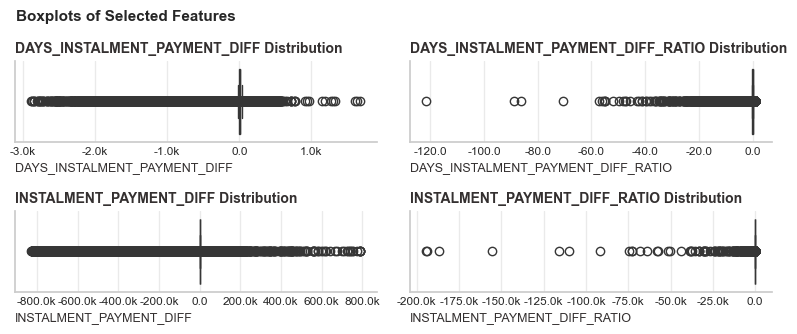

In [28]:
utils.get_boxplots(
    payments_overview, payments_new_cols, figsize=(8, 3.5), right=0.17, top=0.95
)

Additionally, we will create a feature of payment risk that captures the ratio of installment to payment difference, where it is positive, combined with the delay in payment.

In [29]:
payments_overview["PAYMENT_RISK"] = payments_overview[
    "DAYS_INSTALMENT_PAYMENT_DIFF"
].clip(upper=0) * payments_overview["INSTALMENT_PAYMENT_DIFF_RATIO"].clip(lower=0)

In [30]:
print(f"Installments payments table now has those features:")
payments_overview.columns

Installments payments table now has those features:


Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT', 'DAYS_INSTALMENT_PAYMENT_DIFF',
       'DAYS_INSTALMENT_PAYMENT_DIFF_RATIO', 'INSTALMENT_PAYMENT_DIFF',
       'INSTALMENT_PAYMENT_DIFF_RATIO', 'PAYMENT_RISK'],
      dtype='object')

Finally, we will aggregate installment payments data to the previous application level to prepare it for merging with the main application data later on.

In [31]:
installment_summary = con.execute(
    """SELECT
                                        SK_ID_PREV,
                                        SUM(CASE WHEN PAYMENT_DELAY < 0 THEN 1 ELSE 0 END) AS LATE_PAYMENT_COUNT,
                                        SUM(CASE WHEN PAYMENT_DIFF > 0 THEN PAYMENT_DIFF ELSE 0 END) AS TOTAL_UNDERPAYMENT,
                                        SUM(CASE WHEN PAYMENT_DIFF > 0 THEN 1 ELSE 0 END) AS UNDERPAID_COUNT,
                                        SUM(CASE WHEN PAYMENT_DIFF < 0 THEN 1 ELSE 0 END) AS OVERPAID_COUNT,
                                        MAX(PAYMENT_DELAY) AS MIN_PAYMENT_DELAY,
                                        MIN(PAYMENT_DELAY) AS MAX_PAYMENT_DELAY,
                                        MAX(PAYMENT_DIFF) AS MAX_PAYMENT_DIFF,
                                        MIN(PAYMENT_DIFF) AS MIN_PAYMENT_DIFF,
                                        AVG(PAYMENT_DELAY) AS AVG_PAYMENT_DELAY,
                                        AVG(PAYMENT_DIFF) AS AVG_PAYMENT_DIFF,
                                        MAX(DAYS_ENTRY_PAYMENT) AS MOST_RECENT_PAYMENT,
                                        MIN(DAYS_ENTRY_PAYMENT) AS FIRST_PAYMENT,
                                        (AVG(DAYS_ENTRY_PAYMENT) - AVG(DAYS_INSTALMENT))/AVG(DAYS_INSTALMENT) AS AVG_PAYMENT_LAG,
                                        MAX(DAYS_INSTALMENT) AS MOST_RECENT_INSTALMENT,
                                        MIN(DAYS_INSTALMENT) AS FIRST_INSTALMENT,
                                        MAX(NUM_INSTALMENT_NUMBER) AS TOTAL_SCHEDULED_INSTALMENTS,
                                        AVG(DAYS_INSTALMENT_PAYMENT_DIFF_RATIO) AS AVG_DAYS_PAYMENT_DIFF_RATIO,
                                        AVG(INSTALMENT_PAYMENT_DIFF_RATIO) AS AVG_PAYMENT_DIFF_RATIO,
                                        AVG(PAYMENT_RISK) AS AVG_PAYMENT_RISK
                                    FROM
                                   (SELECT
                                        SK_ID_PREV,
                                        SK_ID_CURR,
                                        DAYS_INSTALMENT_PAYMENT_DIFF AS PAYMENT_DELAY,
                                        INSTALMENT_PAYMENT_DIFF AS PAYMENT_DIFF,
                                        DAYS_ENTRY_PAYMENT,
                                        DAYS_INSTALMENT,
                                        DAYS_INSTALMENT_PAYMENT_DIFF_RATIO,
                                        INSTALMENT_PAYMENT_DIFF_RATIO,
                                        PAYMENT_RISK,
                                        NUM_INSTALMENT_NUMBER,
                                    FROM payments_overview)
                                    GROUP BY SK_ID_PREV;"""
).df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

We must check how many missing values are in the aggregated features. Missing values of ratios will be imputed with the median value of the feature not to skew the distribution imputing with another arbitrary value.  Missing values of delays will be imputed with zeroes. We will create missingness indicators for those imputed features as well.

In [32]:
installment_summary.isnull().sum()

SK_ID_PREV                      0
LATE_PAYMENT_COUNT              0
TOTAL_UNDERPAYMENT              0
UNDERPAID_COUNT                 0
OVERPAID_COUNT                  0
MIN_PAYMENT_DELAY              78
MAX_PAYMENT_DELAY              78
MAX_PAYMENT_DIFF                0
MIN_PAYMENT_DIFF                0
AVG_PAYMENT_DELAY              78
AVG_PAYMENT_DIFF                0
MOST_RECENT_PAYMENT            78
FIRST_PAYMENT                  78
AVG_PAYMENT_LAG                78
MOST_RECENT_INSTALMENT          0
FIRST_INSTALMENT                0
TOTAL_SCHEDULED_INSTALMENTS     0
AVG_DAYS_PAYMENT_DIFF_RATIO    78
AVG_PAYMENT_DIFF_RATIO         16
AVG_PAYMENT_RISK               94
dtype: int64

In [33]:
ratio_cols = [
    "AVG_PAYMENT_DIFF_RATIO",
    "AVG_DAYS_PAYMENT_DIFF_RATIO",
    "AVG_PAYMENT_RISK",
]
delay_cols = [
    "MIN_PAYMENT_DELAY",
    "MAX_PAYMENT_DELAY",
    "AVG_PAYMENT_DELAY",
    "FIRST_PAYMENT",
    "MOST_RECENT_PAYMENT",
]

# Ratios with median
for col in ratio_cols:
    installment_summary[f"{col}_MISSING"] = installment_summary[col].isna().astype(int)
    installment_summary[col] = installment_summary[col].fillna(
        installment_summary[col].median()
    )

# Delays / dates with 0
for col in delay_cols:
    installment_summary[f"{col}_MISSING"] = installment_summary[col].isna().astype(int)
    installment_summary[col] = installment_summary[col].fillna(0)

##### **POS_CASH LOAN BALANCE** #####

Now we will explore POS_CASH loan balance dataset - descriptive statistics, and missing values.

In [34]:
cash_loans_overview.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [35]:
cash_loans_overview[cash_loans_overview["CNT_INSTALMENT_FUTURE"].isnull()].head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
709,1889585,403422,-6,NaN,NaN,Signed,0,0
759,1618886,382448,-2,NaN,NaN,Signed,0,0
1887,2288203,429576,-6,NaN,NaN,Signed,0,0
1899,2110224,167171,-6,NaN,NaN,Signed,0,0
1910,2031967,235187,-5,NaN,NaN,Signed,0,0


A very similar number of missing values in CNT_INSTALMENT and CNT_INSTALMENT_FUTURE let us believe that they are missing for the same reason. 

In [36]:
cash_loans_overview.drop(columns=["SK_ID_PREV", "SK_ID_CURR"]).describe()

,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


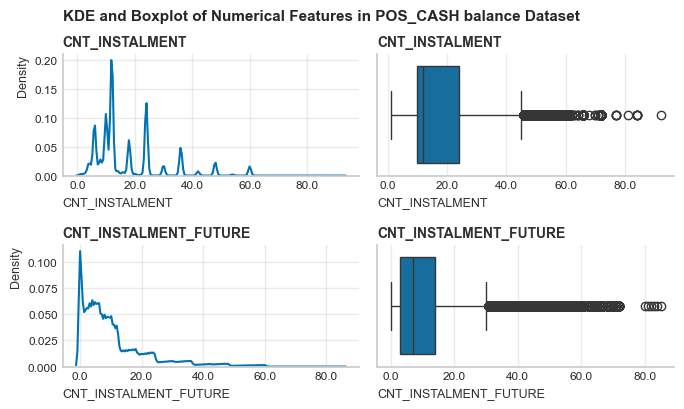

Missing Value Summary:
CNT_INSTALMENT: 26071 missing
CNT_INSTALMENT_FUTURE: 26087 missing


,count,mean,std,min,25%,50%,75%,max
CNT_INSTALMENT,"9,975,287.0",17.1,12.0,1.0,10.0,12.0,24.0,92.0
CNT_INSTALMENT_FUTURE,"9,975,271.0",10.5,11.1,0.0,3.0,7.0,14.0,85.0


In [37]:
utils.get_distribution_plots_with_stat(
    cash_loans_overview,
    ["CNT_INSTALMENT", "CNT_INSTALMENT_FUTURE"],
    right=0.47,
    top=1.02,
    name="POS_CASH balance",
)

We see that both count of instalments features are positively skewed and have a bunch of outliers. Median of CNT_INSTALMENT is 12, but max value is 92. CNT_INSTALMENT_FUTURE has a median of 7, but max value of 85. Since these features will be aggregated several times until final merging, we will leave them as is for now.

Now we will analyze days past due features to understand their distributions.

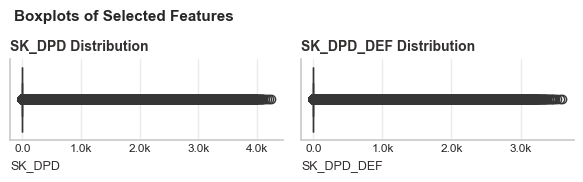

In [38]:
utils.get_boxplots(
    cash_loans_overview, ["SK_DPD", "SK_DPD_DEF"], figsize=(6, 2), right=0.22, top=0.9
)

We see that days past due have more than 75% of the values equal to zero, but there are a lot of outliers that range to very high values (up to 4.2k days). We will cap those to 730 days (2 years) as a reasonable amount to avoid negative impact on the analysis in the SQL aggregation query.

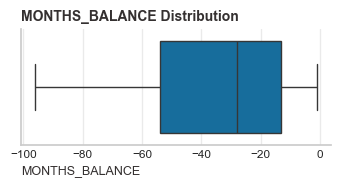

In [39]:
plt.figure(figsize=(4, 1.5))
sns.boxplot(x=cash_loans_overview["MONTHS_BALANCE"])
plt.title("MONTHS_BALANCE Distribution")
plt.show();

We see that for cash loans median MONTHS_BALANCE is -28, meaning that on average the data goes back 28 months. However, the minimum of MONTHS_BALANCE is as low as -96 months. We will leave those values as they might be valid.

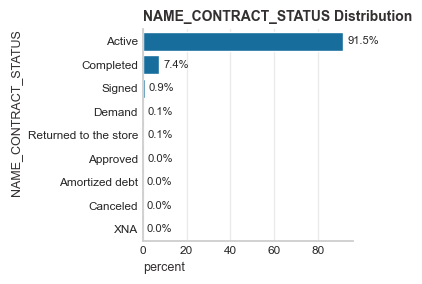

In [40]:
utils.get_countplots(cash_loans_overview, ["NAME_CONTRACT_STATUS"], figsize=(4, 3))

We see that majority (~92%) of the cash loans are active and only 7% are completed.

In [41]:
con.execute(
    """SELECT COUNT(DISTINCT SK_ID_CURR) as n_curr_appl,
             COUNT(DISTINCT SK_ID_PREV) as n_prev_appl,
            FROM
            cash_loans"""
).df()

,n_curr_appl,n_prev_appl
0,337252,936325


We can estimate that one current application has on average ~2.8 previous POS_CASH loans. Finally, we will aggregate POS_CASH loan balance data to the previous application level to prepare it for merging with the main application data later on.

In [42]:
cash_loan_summary = con.execute(
    """WITH cleaned_pos_cash  AS (
                                                        SELECT 
                                                            SK_ID_PREV,
                                                            MONTHS_BALANCE,
                                                            NAME_CONTRACT_STATUS,
                                                            
                                                            LEAST(SK_DPD, 730) AS SK_DPD_CAPPED,
                                                            LEAST(SK_DPD_DEF, 730) AS SK_DPD_DEF_CAPPED,
                                                            
                                                            COALESCE(CNT_INSTALMENT, 0) AS CNT_INSTALMENT_FULL,
                                                            COALESCE(CNT_INSTALMENT_FUTURE, 0) AS CNT_INSTALMENT_FUTURE_FULL
                                                        FROM cash_loans_overview   
                                                    )
                                SELECT
                                        SK_ID_PREV,
                                        COUNT(MONTHS_BALANCE) AS POS_COUNT_RECORDS,
                                        
                                        MAX(MONTHS_BALANCE) AS POS_MOST_RECENT_MONTH,
                                        MIN(MONTHS_BALANCE) AS POS_OLDEST_MONTH,
                                        MIN(MONTHS_BALANCE) - MAX(MONTHS_BALANCE) AS POS_MONTHS_SPAN,
                                        
                                        MAX(SK_DPD_CAPPED) AS POS_MAX_DPD,
                                        AVG(SK_DPD_CAPPED) AS POS_AVG_DPD,
                                        
                                        MAX(SK_DPD_DEF_CAPPED) AS POS_MAX_DPD_DEF,
                                        AVG(SK_DPD_DEF_CAPPED) AS POS_AVG_DPD_DEF,
                                        
                                        SUM(CASE WHEN SK_DPD_CAPPED > 0 THEN 1 ELSE 0 END) AS POS_DPD_COUNT,
                                        AVG(CASE WHEN SK_DPD_CAPPED > 0 THEN 1 ELSE 0 END) AS POS_DPD_RATIO,
                                        
                                        MIN(CNT_INSTALMENT_FUTURE_FULL) AS POS_MIN_SCHEDULED_INSTALMENT,
                                        AVG(CNT_INSTALMENT_FUTURE_FULL) AS POS_AVG_SCHEDULED_INSTALMENT,
                                        MAX(CNT_INSTALMENT_FUTURE_FULL) AS POS_MAX_SCHEDULED_INSTALMENT,
                                        MAX(CNT_INSTALMENT_FULL) AS POS_MAX_INSTALMENT_PLAN,
                                        AVG(CNT_INSTALMENT_FULL) AS POS_AVG_INSTALMENT_PLAN,
                                        
                                        MAX(CNT_INSTALMENT_FULL - CNT_INSTALMENT_FUTURE_FULL) AS POS_MAX_INSTALMENT_PAID,
                                        COALESCE(AVG(CNT_INSTALMENT_FUTURE_FULL / NULLIF(CNT_INSTALMENT_FULL, 0)), 0) AS POS_AVG_FUTURE_RATIO,
                                        
                                        SUM(CASE WHEN NAME_CONTRACT_STATUS = 'Active' THEN 1 ELSE 0 END) AS POS_ACTIVE_COUNT,
                                        SUM(CASE WHEN NAME_CONTRACT_STATUS = 'Completed' THEN 1 ELSE 0 END) AS POS_COMPLETED_COUNT,
                                        SUM(CASE WHEN NAME_CONTRACT_STATUS = 'Signed' THEN 1 ELSE 0 END) AS POS_SIGNED_COUNT,

                                        AVG(CASE WHEN NAME_CONTRACT_STATUS = 'Completed' THEN 1 ELSE 0 END) AS POS_RATIO_COMPLETED_MONTHS

                                    FROM
                                    cleaned_pos_cash
                                    GROUP BY SK_ID_PREV;"""
).df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [43]:
print(f"The shape of the aggregated table is {cash_loan_summary.shape}.")

The shape of the aggregated table is (936325, 22).


In [44]:
print("Missing Value Summary:")
cash_loan_summary.isnull().sum()

Missing Value Summary:


SK_ID_PREV                      0
POS_COUNT_RECORDS               0
POS_MOST_RECENT_MONTH           0
POS_OLDEST_MONTH                0
POS_MONTHS_SPAN                 0
POS_MAX_DPD                     0
POS_AVG_DPD                     0
POS_MAX_DPD_DEF                 0
POS_AVG_DPD_DEF                 0
POS_DPD_COUNT                   0
POS_DPD_RATIO                   0
POS_MIN_SCHEDULED_INSTALMENT    0
POS_AVG_SCHEDULED_INSTALMENT    0
POS_MAX_SCHEDULED_INSTALMENT    0
POS_MAX_INSTALMENT_PLAN         0
POS_AVG_INSTALMENT_PLAN         0
POS_MAX_INSTALMENT_PAID         0
POS_AVG_FUTURE_RATIO            0
POS_ACTIVE_COUNT                0
POS_COMPLETED_COUNT             0
POS_SIGNED_COUNT                0
POS_RATIO_COMPLETED_MONTHS      0
dtype: int64

We see that out table has no missing values after aggregation.

##### **CREDIT CARD BALANCE** #####

Next we move to credit card balance dataset - descriptive statistics, and missing values.

In [45]:
cred_cards_overview.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

In [46]:
cred_cards_overview.describe(exclude=np.number)

,NAME_CONTRACT_STATUS
count,3840312
unique,7
top,Active
freq,3698436


We can notice that dataset of previous credit cards snapshots has missing values for several features, that seem related to each other and missingness is meaningful here.

We see that only one feature is categorical - NAME_CONTRACT_STATUS, and most (~96%) credit cards were active and only ~3% were closed.

In [47]:
cred_cards_overview.NAME_CONTRACT_STATUS.value_counts(normalize=True).map(
    lambda x: f"{x:.1%}"
)

NAME_CONTRACT_STATUS
Active           96.3%
Completed         3.4%
Signed            0.3%
Demand            0.0%
Sent proposal     0.0%
Refused           0.0%
Approved          0.0%
Name: proportion, dtype: object

Now we will start exploring numerical features. First, the ones related to amount of drawings.

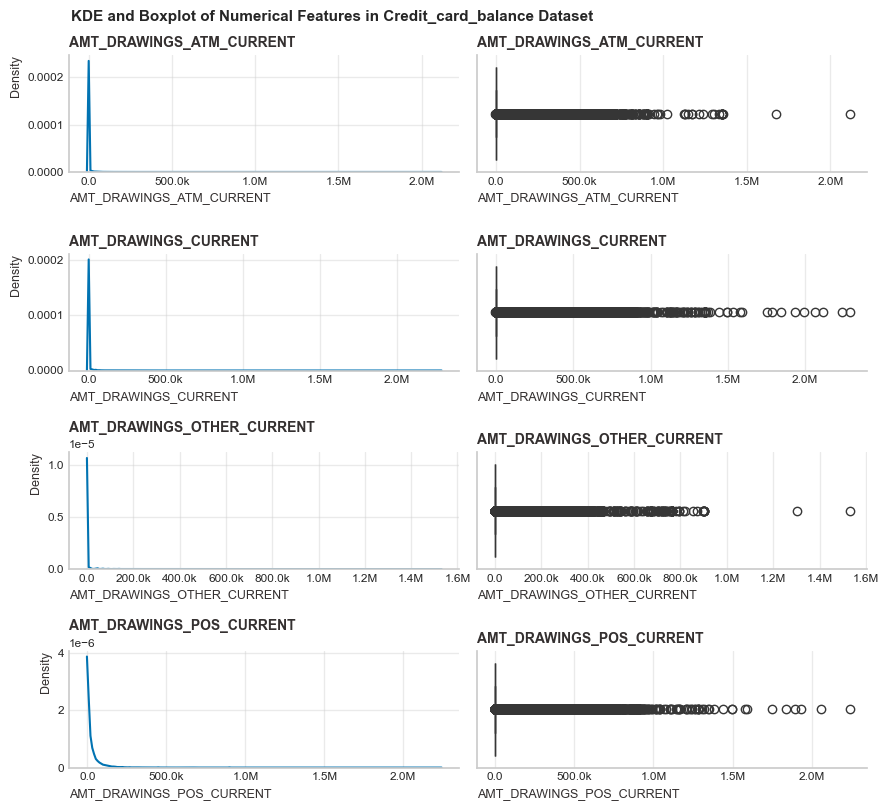

Missing Value Summary:
AMT_DRAWINGS_ATM_CURRENT: 749816 missing
AMT_DRAWINGS_CURRENT: 0 missing
AMT_DRAWINGS_OTHER_CURRENT: 749816 missing
AMT_DRAWINGS_POS_CURRENT: 749816 missing


,count,mean,std,min,25%,50%,75%,max
AMT_DRAWINGS_ATM_CURRENT,"3,090,496.0","5,961.3","28,225.7","-6,827.3",0.0,0.0,0.0,"2,115,000.0"
AMT_DRAWINGS_CURRENT,"3,840,312.0","7,433.4","33,846.1","-6,211.6",0.0,0.0,0.0,"2,287,098.3"
AMT_DRAWINGS_OTHER_CURRENT,"3,090,496.0",288.2,"8,202.0",0.0,0.0,0.0,0.0,"1,529,847.0"
AMT_DRAWINGS_POS_CURRENT,"3,090,496.0","2,968.8","20,796.9",0.0,0.0,0.0,0.0,"2,239,274.2"


In [48]:
amt_drawings_cols = [
    col for col in cred_cards_overview.columns if col.startswith("AMT_DRAWINGS")
]
utils.get_distribution_plots_with_stat(
    cred_cards_overview,
    amt_drawings_cols,
    right=0.385,
    top=1.01,
    width=9,
    name="Credit_card_balance",
)

We see that distributions for all features related to amount of drawings are positively skewed and have a bunch of outliers. We will leave those outliers as they might be valid values, and we will aggregate them later. But there are some extreme values which we will cap to the 99.9th percentile to reduce their negative impact on the analysis.

In [49]:
cred_cards_overview = utils.winsorize_features(
    cred_cards_overview, amt_drawings_cols, upper=0.999
)

Next we will investigate distributions of features related to count of drawings and installments.

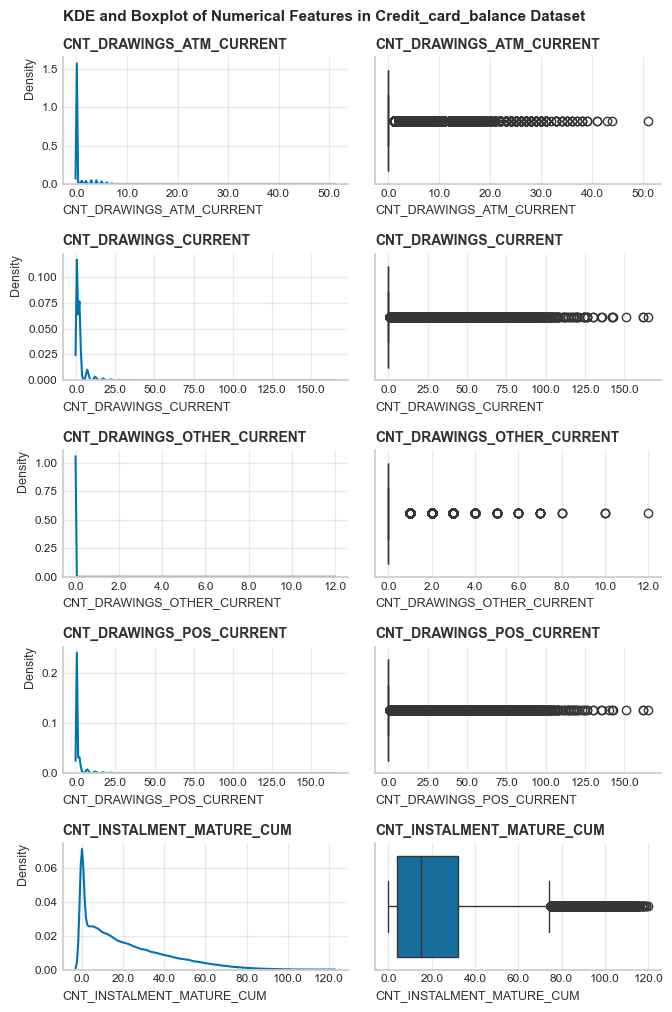

Missing Value Summary:
CNT_DRAWINGS_ATM_CURRENT: 749816 missing
CNT_DRAWINGS_CURRENT: 0 missing
CNT_DRAWINGS_OTHER_CURRENT: 749816 missing
CNT_DRAWINGS_POS_CURRENT: 749816 missing
CNT_INSTALMENT_MATURE_CUM: 305236 missing


,count,mean,std,min,25%,50%,75%,max
CNT_DRAWINGS_ATM_CURRENT,"3,090,496.0",0.3,1.1,0.0,0.0,0.0,0.0,51.0
CNT_DRAWINGS_CURRENT,"3,840,312.0",0.7,3.2,0.0,0.0,0.0,0.0,165.0
CNT_DRAWINGS_OTHER_CURRENT,"3,090,496.0",0.0,0.1,0.0,0.0,0.0,0.0,12.0
CNT_DRAWINGS_POS_CURRENT,"3,090,496.0",0.6,3.2,0.0,0.0,0.0,0.0,165.0
CNT_INSTALMENT_MATURE_CUM,"3,535,076.0",20.8,20.1,0.0,4.0,15.0,32.0,120.0


In [50]:
cnt_cols = [col for col in cred_cards_overview.columns if col.startswith("CNT")]
utils.get_distribution_plots_with_stat(
    cred_cards_overview, cnt_cols, right=0.475, top=1.01, name="Credit_card_balance"
)

We see that again those features have positively skewed distributions with a bunch of outliers. We will leave those outliers as they might be valid values, and we will aggregate them later. 

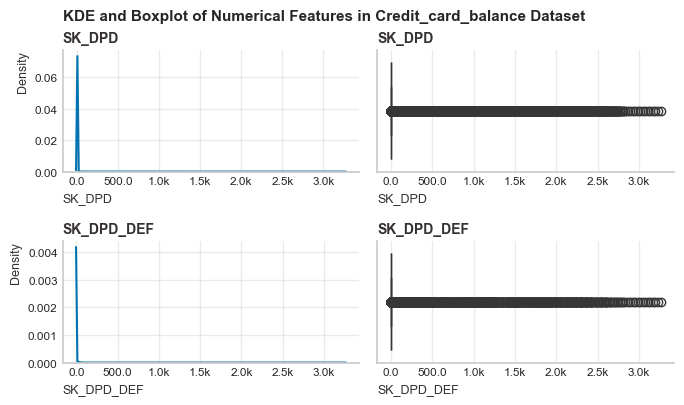

Missing Value Summary:
SK_DPD: 0 missing
SK_DPD_DEF: 0 missing


,count,mean,std,min,25%,50%,75%,max
SK_DPD,"3,840,312.0",9.3,97.5,0.0,0.0,0.0,0.0,"3,260.0"
SK_DPD_DEF,"3,840,312.0",0.3,21.5,0.0,0.0,0.0,0.0,"3,260.0"


In [51]:
dpd_cols = [col for col in cred_cards_overview.columns if col.startswith("SK_DPD")]
utils.get_distribution_plots_with_stat(
    cred_cards_overview, dpd_cols, right=0.475, top=1.01, name="Credit_card_balance"
)

We can notice that both features of days past due have more than 75% of the values equal to zero, but there are a lot of outliers that range to very high values (up to 3.5k days). We will cap those to 730 days (2 years) as a reasonable amount when aggregating the dataset.

Lastly we will go through distributions of the rest of the numerical features.

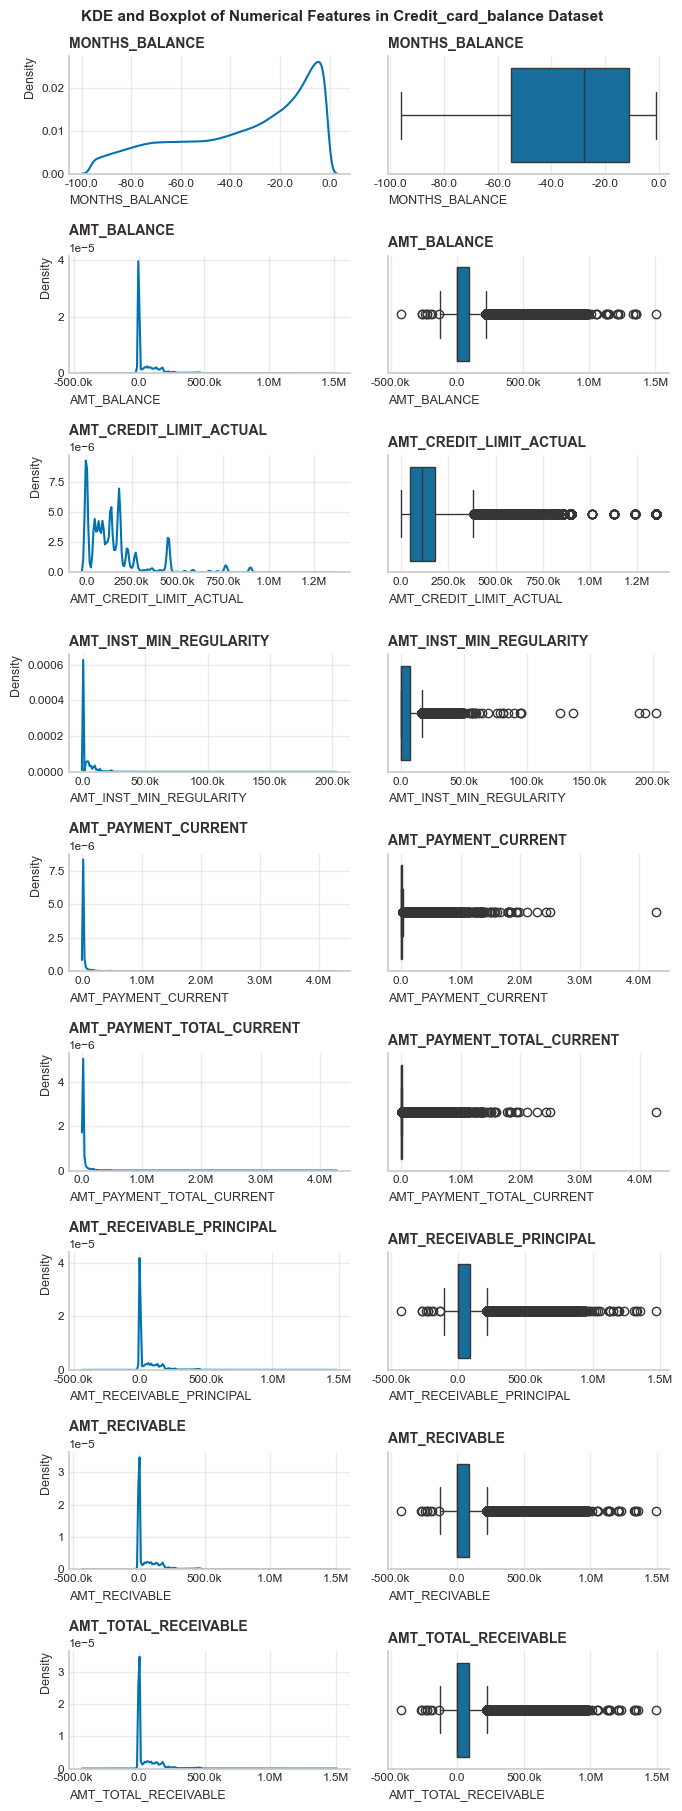

Missing Value Summary:
MONTHS_BALANCE: 0 missing
AMT_BALANCE: 0 missing
AMT_CREDIT_LIMIT_ACTUAL: 0 missing
AMT_INST_MIN_REGULARITY: 305236 missing
AMT_PAYMENT_CURRENT: 767988 missing
AMT_PAYMENT_TOTAL_CURRENT: 0 missing
AMT_RECEIVABLE_PRINCIPAL: 0 missing
AMT_RECIVABLE: 0 missing
AMT_TOTAL_RECEIVABLE: 0 missing


,count,mean,std,min,25%,50%,75%,max
MONTHS_BALANCE,"3,840,312.0",-34.5,26.7,-96.0,-55.0,-28.0,-11.0,-1.0
AMT_BALANCE,"3,840,312.0","58,300.2","106,307.0","-420,250.2",0.0,0.0,"89,046.7","1,505,902.2"
AMT_CREDIT_LIMIT_ACTUAL,"3,840,312.0","153,808.0","165,145.7",0.0,"45,000.0","112,500.0","180,000.0","1,350,000.0"
AMT_INST_MIN_REGULARITY,"3,535,076.0","3,540.2","5,600.2",0.0,0.0,0.0,"6,633.9","202,882.0"
AMT_PAYMENT_CURRENT,"3,072,324.0","10,280.5","36,078.1",0.0,152.4,"2,702.7","9,000.0","4,289,207.4"
AMT_PAYMENT_TOTAL_CURRENT,"3,840,312.0","7,588.9","32,006.0",0.0,0.0,0.0,"6,750.0","4,278,315.7"
AMT_RECEIVABLE_PRINCIPAL,"3,840,312.0","55,965.9","102,533.6","-423,305.8",0.0,0.0,"85,359.2","1,472,316.8"
AMT_RECIVABLE,"3,840,312.0","58,088.8","105,965.4","-420,250.2",0.0,0.0,"88,899.5","1,493,338.2"
AMT_TOTAL_RECEIVABLE,"3,840,312.0","58,098.3","105,971.8","-420,250.2",0.0,0.0,"88,914.5","1,493,338.2"


In [52]:
amt_other_cols = [
    col
    for col in cred_cards_overview.columns
    if any(
        key in col
        for key in ["BALANCE", "CREDIT", "RECEIVABLE", "RECIVABLE", "PAYMENT", "INST_"]
    )
]
utils.get_distribution_plots_with_stat(
    cred_cards_overview, amt_other_cols, right=0.5, top=1.005, name="Credit_card_balance"
)

For amount values related to payments and installments we can see some very extreme values to the upper side, so we will cap those values to the 99.9th percentile.

In [53]:
cred_cards_overview.rename(columns={"AMT_RECIVABLE": "AMT_RECEIVABLE"}, inplace=True)

In [54]:
amt_other_cols_cap_upper = [
    col
    for col in cred_cards_overview.columns
    if any(key in col for key in ["PAYMENT", "INST_"])
]
cred_cards_overview = utils.winsorize_features(
    cred_cards_overview, amt_other_cols_cap_upper, upper=0.999
)

We must check if AMT_RECEIVALBLE and AMT_RECEIVABLE_PRINCIPAL hold the same values, since they seem to be similar. We see that 11k rows have different values for those two features, so we will keep both for further analysis.

In [55]:
(
    cred_cards_overview["AMT_RECEIVABLE"] != cred_cards_overview["AMT_TOTAL_RECEIVABLE"]
).sum()

11244

Next we will check if the sum of amount of drawings using different sources are equal to AMT_DRAWINGS_CURRENT feature

In [56]:
series_drawings = (
    cred_cards_overview["AMT_DRAWINGS_ATM_CURRENT"]
    + cred_cards_overview["AMT_DRAWINGS_OTHER_CURRENT"]
    + cred_cards_overview["AMT_DRAWINGS_POS_CURRENT"]
)

(series_drawings != cred_cards_overview["AMT_DRAWINGS_CURRENT"]).sum()

771419

We will create additional feature to capture the difference between those drawings. 

Finally, we will aggregate features by SK_ID_PREV to prepare it for merging with the main application data later on.

In [57]:
cred_cards_overview["AMT_UNACCOUNTED_DRAWINGS"] = (
    cred_cards_overview["AMT_DRAWINGS_CURRENT"]
    - cred_cards_overview["AMT_DRAWINGS_ATM_CURRENT"]
    + cred_cards_overview["AMT_DRAWINGS_OTHER_CURRENT"]
    + cred_cards_overview["AMT_DRAWINGS_POS_CURRENT"]
)

In [58]:
credit_card_summary = con.execute(
    """WITH cleaned_cred_cards AS (
                                        SELECT
                                        SK_ID_PREV,
                                        MONTHS_BALANCE,
                                        
                                        LEAST(SK_DPD, 730) AS SK_DPD_CAPPED,
                                        LEAST(SK_DPD_DEF, 730) AS SK_DPD_DEF_CAPPED,
                                        
                                        COALESCE(AMT_BALANCE, 0) AS AMT_BALANCE,
                                        COALESCE(AMT_CREDIT_LIMIT_ACTUAL, 0) AS AMT_CREDIT_LIMIT_ACTUAL,
                                        COALESCE(AMT_DRAWINGS_ATM_CURRENT, 0) AS AMT_DRAWINGS_ATM_CURRENT,
                                        COALESCE(AMT_DRAWINGS_CURRENT, 0) AS AMT_DRAWINGS_CURRENT,
                                        COALESCE(AMT_DRAWINGS_OTHER_CURRENT, 0) AS AMT_DRAWINGS_OTHER_CURRENT, 
                                        COALESCE(AMT_DRAWINGS_POS_CURRENT, 0) AS AMT_DRAWINGS_POS_CURRENT,
                                        COALESCE(AMT_PAYMENT_CURRENT, 0) AS AMT_PAYMENT_CURRENT,
                                        
                                        COALESCE(AMT_PAYMENT_TOTAL_CURRENT, 0) AS AMT_PAYMENT_TOTAL_CURRENT,
                                        COALESCE(AMT_RECEIVABLE, 0) AS AMT_RECEIVABLE,
                                        COALESCE(AMT_RECEIVABLE_PRINCIPAL, 0) AS AMT_RECEIVABLE_PRINCIPAL,
                                        COALESCE(AMT_TOTAL_RECEIVABLE, 0) AS AMT_TOTAL_RECEIVABLE,
                                        
                                        COALESCE(AMT_INST_MIN_REGULARITY, 0) AS AMT_INST_MIN_REGULARITY,
                                        
                                        COALESCE(CNT_DRAWINGS_ATM_CURRENT, 0) AS CNT_DRAWINGS_ATM_CURRENT,
                                        COALESCE(CNT_DRAWINGS_CURRENT, 0) AS CNT_DRAWINGS_CURRENT,
                                        COALESCE(CNT_DRAWINGS_OTHER_CURRENT, 0) AS CNT_DRAWINGS_OTHER_CURRENT,
                                        COALESCE(CNT_DRAWINGS_POS_CURRENT, 0) AS CNT_DRAWINGS_POS_CURRENT,
                                        COALESCE(CNT_INSTALMENT_MATURE_CUM, 0) AS CNT_INSTALMENT_MATURE_CUM,
                                        AMT_UNACCOUNTED_DRAWINGS,
                                        NAME_CONTRACT_STATUS
                                        
                                    FROM cred_cards_overview)
                                    
                                  SELECT
                                        SK_ID_PREV,
                                        COUNT(MONTHS_BALANCE) AS CC_MONTHLY_RECORDS,
                                        MAX(MONTHS_BALANCE) AS CC_MOST_RECENT_MONTH,
                                        MIN(MONTHS_BALANCE) AS CC_OLDEST_MONTH,
                                        MIN(MONTHS_BALANCE) - MAX(MONTHS_BALANCE) AS CC_MONTHS_SPAN,
                                        
                                        MAX(SK_DPD_CAPPED) AS CC_MAX_DPD,
                                        AVG(SK_DPD_CAPPED) AS CC_AVG_DPD,
                                        MAX(SK_DPD_DEF_CAPPED) AS CC_MAX_DPD_DEF,
                                        AVG(SK_DPD_DEF_CAPPED) AS CC_AVG_DPD_DEF,
                                        SUM(CASE WHEN SK_DPD_CAPPED > 0 THEN 1 ELSE 0 END) AS CC_DPD_COUNT,
                                        
                                        MAX(AMT_BALANCE) AS CC_MAX_BALANCE,
                                        AVG(AMT_BALANCE) AS CC_AVG_BALANCE,
                                        COALESCE(STDDEV(AMT_BALANCE), 0) AS CC_STD_BALANCE,
                                        
                                        AVG(AMT_CREDIT_LIMIT_ACTUAL) AS CC_AVG_CREDIT_LIMIT,
                                        MAX(AMT_CREDIT_LIMIT_ACTUAL) AS CC_MAX_CREDIT_LIMIT,
                                        CASE 
                                            WHEN AVG(AMT_CREDIT_LIMIT_ACTUAL) > 0 THEN 
                                            AVG(AMT_BALANCE) / AVG(AMT_CREDIT_LIMIT_ACTUAL)
                                            ELSE 0
                                        END AS CC_AVG_UTILIZATION_RATIO,
                                        
                                        CASE
                                            WHEN MAX(AMT_CREDIT_LIMIT_ACTUAL) > 0 THEN 
                                            MAX(AMT_BALANCE) / MAX(AMT_CREDIT_LIMIT_ACTUAL)
                                            ELSE 0
                                        END AS CC_MAX_UTILIZATION_RATIO,
                                        
                                        AVG(AMT_DRAWINGS_ATM_CURRENT) AS CC_AVG_DRAWINGS_ATM,   
                                        AVG(AMT_DRAWINGS_CURRENT) AS CC_AVG_DRAWINGS,
                                        SUM(AMT_DRAWINGS_CURRENT) AS CC_SUM_DRAWINGS,
                                        MAX(AMT_DRAWINGS_CURRENT) AS CC_MAX_DRAWINGS,
                                        AVG(AMT_DRAWINGS_OTHER_CURRENT) AS CC_AVG_DRAWINGS_OTHER,
                                        AVG(AMT_DRAWINGS_POS_CURRENT) AS CC_AVG_DRAWINGS_POS,
                                        COALESCE(SUM(AMT_UNACCOUNTED_DRAWINGS), 0) AS CC_SUM_UNACCOUNTED_DRAWINGS,
                                        COALESCE(AVG(AMT_UNACCOUNTED_DRAWINGS), 0) AS CC_AVG_UNACCOUNTED_DRAWINGS,
                                        CASE 
                                            WHEN COUNT(CASE WHEN AMT_DRAWINGS_CURRENT > 0 THEN 1 END) > 0 THEN
                                            SUM(AMT_DRAWINGS_CURRENT) / COUNT(CASE WHEN AMT_DRAWINGS_CURRENT > 0 THEN 1 END)
                                            ELSE 0
                                        END AS CC_AVG_NON_ZERO_DRAWINGS,
                                        
                                        SUM(CNT_DRAWINGS_ATM_CURRENT) AS CC_SUM_CNT_DRAWINGS_ATM,
                                        SUM(CNT_DRAWINGS_CURRENT) AS CC_SUM_CNT_DRAWINGS,
                                        MAX(CNT_DRAWINGS_CURRENT) AS CC_MAX_CNT_DRAWINGS,
                                        SUM(CNT_DRAWINGS_OTHER_CURRENT) AS CC_SUM_CNT_DRAWINGS_OTHER,
                                        SUM(CNT_DRAWINGS_POS_CURRENT) AS CC_SUM_CNT_DRAWINGS_POS,
                                        
                                        AVG(AMT_PAYMENT_CURRENT) AS CC_AVG_PAYMENT_CURRENT,
                                        SUM(AMT_PAYMENT_CURRENT) AS CC_SUM_PAYMENT_CURRENT,
                                        AVG(AMT_PAYMENT_TOTAL_CURRENT) AS CC_AVG_PAYMENT_TOTAL_CURRENT,
                                        SUM(AMT_PAYMENT_TOTAL_CURRENT) AS CC_SUM_PAYMENT_TOTAL_CURRENT,
                                        
                                        MAX(CNT_INSTALMENT_MATURE_CUM) AS CC_MAX_INSTALMENT_MATURED,
                                        AVG(CNT_INSTALMENT_MATURE_CUM) AS CC_AVG_INSTALMENT_MATURED,
                                        
                                        AVG(AMT_RECEIVABLE) AS CC_AVG_RECEIVABLE,
                                        MAX(AMT_RECEIVABLE) AS CC_MAX_RECEIVABLE,
                                        AVG(AMT_RECEIVABLE_PRINCIPAL) AS CC_AVG_RECEIVABLE_PRINCIPAL,
                                        MAX(AMT_RECEIVABLE_PRINCIPAL) AS CC_MAX_RECEIVABLE_PRINCIPAL,
                                        COALESCE(STDDEV(AMT_RECEIVABLE_PRINCIPAL), 0) AS CC_STD_RECEIVABLE_PRINCIPAL,
                                        AVG(AMT_TOTAL_RECEIVABLE) AS CC_AVG_TOTAL_RECEIVABLE,
                                        MAX(AMT_TOTAL_RECEIVABLE) AS CC_MAX_TOTAL_RECEIVABLE,
                                        COALESCE(STDDEV(AMT_TOTAL_RECEIVABLE), 0) AS CC_STD_TOTAL_RECEIVABLE,
                                        MAX(AMT_INST_MIN_REGULARITY) AS CC_MAX_MIN_INSTALMENT,
                                        AVG(AMT_INST_MIN_REGULARITY) AS CC_AVG_MIN_INSTALMENT,
                                        
                                        CASE 
                                            WHEN SUM(AMT_DRAWINGS_CURRENT) > 0 THEN
                                            SUM(AMT_PAYMENT_TOTAL_CURRENT) / SUM(AMT_DRAWINGS_CURRENT)
                                            ELSE 0
                                        END AS CC_PAYMENT_TO_DRAWINGS_RATIO,
                                        
                                        CASE 
                                            WHEN SUM(AMT_BALANCE) > 0 THEN
                                            SUM(AMT_PAYMENT_TOTAL_CURRENT) / SUM(AMT_BALANCE)
                                            ELSE 0
                                        END AS CC_PAYMENT_TO_BALANCE_RATIO,
                                        
                                        CASE 
                                            WHEN AVG(AMT_INST_MIN_REGULARITY) > 0 THEN
                                            AVG(AMT_PAYMENT_TOTAL_CURRENT) / AVG(AMT_INST_MIN_REGULARITY)
                                            ELSE 0
                                        END AS CC_PAYMENT_TO_MIN_INSTALMENT_RATIO,
                                        
                                        SUM(CASE WHEN NAME_CONTRACT_STATUS = 'Active' THEN 1 ELSE 0 END) AS CC_ACTIVE_COUNT,
                                        SUM(CASE WHEN NAME_CONTRACT_STATUS = 'Completed' THEN 1 ELSE 0 END) AS CC_COMPLETED_COUNT,
                                        SUM(CASE WHEN NAME_CONTRACT_STATUS = 'Signed' THEN 1 ELSE 0 END) AS CC_SIGNED_COUNT,
                                        SUM(CASE WHEN NAME_CONTRACT_STATUS = 'Demand' THEN 1 ELSE 0 END) AS CC_DEMAND_COUNT,
                                        
                                        AVG(CASE WHEN NAME_CONTRACT_STATUS = 'Active' THEN 1 ELSE 0 END) AS CC_ACTIVE_RATIO,
                                        AVG(CASE WHEN NAME_CONTRACT_STATUS = 'Completed' THEN 1 ELSE 0 END) AS CC_COMPLETED_RATIO,
                                        AVG(CASE WHEN NAME_CONTRACT_STATUS = 'Signed' THEN 1 ELSE 0 END) AS CC_SIGNED_RATIO,
                                        AVG(CASE WHEN NAME_CONTRACT_STATUS = 'Demand' THEN 1 ELSE 0 END) AS CC_DEMAND_RATIO

                                  FROM cleaned_cred_cards
                                    GROUP BY SK_ID_PREV"""
).df()

In [59]:
print(f"Aggregated table has the shape: {credit_card_summary.shape}.")

Aggregated table has the shape: (104307, 58).


##### **PREVIOUS APPLICATIONS**

In this section we will explore previous applications dataset - descriptive statistics, and missing values.

##### **Feature Missingness** #####

Previous application table has a bunch of features with quite a lot of missing values.

In [60]:
print(f"The table has {prev_applic_overview.duplicated().sum()} duplicated rows.")
print("Missing values in previous application dataset:")
prev_applic_overview.isnull().sum()

The table has 0 duplicated rows.
Missing values in previous application dataset:


SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

We see that there is one row with AMT_CREDIT one missing value, let's explore it further.

In [61]:
prev_applic_overview[prev_applic_overview["AMT_CREDIT"].isnull()]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1127152,2204450,438387,Revolving loans,0.0,0.0,NaN,NaN,NaN,FRIDAY,10,Y,1,NaN,NaN,NaN,XAP,Approved,-608,XNA,XAP,None,Repeater,XNA,Cards,walk-in,Country-wide,20,Connectivity,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN


We will remove this row since it has a lot of missing values.

In [62]:
prev_applic_overview = prev_applic_overview.dropna(subset=["AMT_CREDIT"])

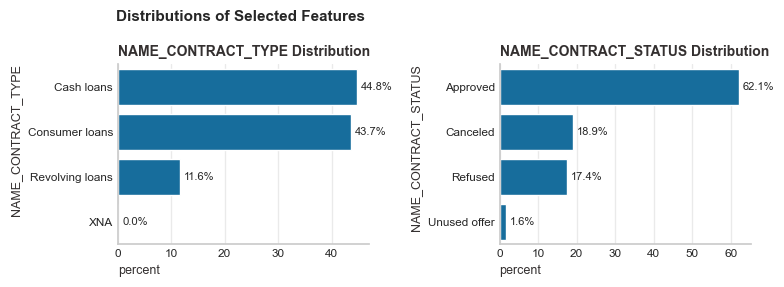

In [63]:
utils.get_countplots(
    prev_applic_overview,
    ["NAME_CONTRACT_TYPE", "NAME_CONTRACT_STATUS"],
    figsize=(8, 3),
    right=0.31,
    top=0.95,
)

We see that most previous contracts were cash loans (~45%) or consumer loans (~44%), while only ~12% were revolving loans. ~62% were approved, ~17% were refused, and the rest were cancelled (~19%) or unused offers.

Further we will investigate records were AMT_CREDIT is zero by contract type and status.

In [64]:
prev_applic_overview[
    prev_applic_overview["AMT_CREDIT"] == 0
].NAME_CONTRACT_TYPE.value_counts(normalize=True).map(lambda x: f"{x:.2%}")

NAME_CONTRACT_TYPE
Cash loans         84.72%
Revolving loans    14.77%
Consumer loans      0.41%
XNA                 0.10%
Name: proportion, dtype: object

In [65]:
prev_applic_overview[
    prev_applic_overview["AMT_CREDIT"] == 0
].NAME_CONTRACT_STATUS.value_counts(normalize=True).map(lambda x: f"{x:.2%}")

NAME_CONTRACT_STATUS
Canceled        90.73%
Refused          8.66%
Approved         0.46%
Unused offer     0.15%
Name: proportion, dtype: object

We see that majority of the credits which have zero credit amount were canceled (~91%), and most were cash loans (~85%). Next we will investigate which contracts have zero amount of credit and are approved or not. 

In [66]:
prev_applic_overview[
    (prev_applic_overview.NAME_CONTRACT_STATUS.isin(["Approved"]))
    & (prev_applic_overview.AMT_CREDIT == 0)
].NAME_CONTRACT_TYPE.value_counts(normalize=True).map(lambda x: f"{x:.2%}")

NAME_CONTRACT_TYPE
Revolving loans    100.00%
Name: proportion, dtype: object

We have found out that approved loans with zero credit amount are revolving loans.

In [67]:
prev_applic_overview[
    (~prev_applic_overview.NAME_CONTRACT_STATUS.isin(["Approved"]))
    & (prev_applic_overview.AMT_CREDIT == 0)
].NAME_CONTRACT_TYPE.value_counts(normalize=True).map(lambda x: f"{x:.2%}")

NAME_CONTRACT_TYPE
Cash loans         85.11%
Revolving loans    14.38%
Consumer loans      0.41%
XNA                 0.10%
Name: proportion, dtype: object

85% of cash loans have AMT_CREDIT zero and were not approved. So we can state that only approved revolving loans have AMT_CREDIT zero.

We will check which proportion of previous applications have AMT_CREDIT zero by contract status.

In [68]:
prev_applic_overview.groupby("NAME_CONTRACT_STATUS")["AMT_CREDIT"].apply(
    lambda x: (x == 0).mean()
).map(lambda x: f"{x:.2%}")

NAME_CONTRACT_STATUS
Approved         0.15%
Canceled        96.60%
Refused         10.03%
Unused offer     1.86%
Name: AMT_CREDIT, dtype: object

We see that ~97% of canceled previous applications have credit amount equal to zero. We will keep those records as they might be valid.

Next we will check missingness patterns in AMT_ANNUITY feature.

In [69]:
prev_applic_overview[prev_applic_overview["AMT_ANNUITY"].isnull()].head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,None,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,None,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,None,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
annuity_null = prev_applic_overview[prev_applic_overview["AMT_ANNUITY"].isnull()]

annuity_null["NAME_CONTRACT_STATUS"].value_counts(normalize=True).map(
    lambda x: f"{x:.2%}"
)

NAME_CONTRACT_STATUS
Canceled        82.15%
Refused         10.99%
Unused offer     6.86%
Approved         0.00%
Name: proportion, dtype: object

We see that annuity amounts are also missing for 82% of canceled previous applications. So missingness seems to be meaningful here. We will keep those records as they might be valid.

We will create missingness indicator for the AMT_ANNUITY feature, in addition, We can notice that no approved loans have zero annuity amount. Missing values imputation with zero could be considered, but this could be mistaken for actual zero annuity values. So we will leave those missing values as they are.

In [71]:
prev_applic_overview["AMT_ANNUITY_MISSING"] = (
    prev_applic_overview["AMT_ANNUITY"].isna().astype(int)
)

Next we will explore AMT_DOWN_PAYMENT feature and its missingness patterns.

In [72]:
prev_applic_overview[
    prev_applic_overview["AMT_DOWN_PAYMENT"].isnull()
].NAME_CONTRACT_STATUS.value_counts(normalize=True).map(lambda x: f"{x:.2%}")

NAME_CONTRACT_STATUS
Approved        41.79%
Canceled        35.24%
Refused         22.70%
Unused offer     0.27%
Name: proportion, dtype: object

In [73]:
prev_applic_overview[
    prev_applic_overview["AMT_DOWN_PAYMENT"].isnull()
].NAME_CONTRACT_TYPE.value_counts(normalize=True).map(lambda x: f"{x:.2%}")

NAME_CONTRACT_TYPE
Cash loans         78.10%
Revolving loans    21.29%
Consumer loans      0.57%
XNA                 0.04%
Name: proportion, dtype: object

We see that most down payment amounts are missing for approved (~42%) and canceled (~35%) previous applications. ~78% of cash loans have missing downpayment amount. So missingness seems to be meaningful here as well.

In [74]:
prev_applic_overview[prev_applic_overview["AMT_DOWN_PAYMENT"].isnull()].groupby(
    "NAME_CONTRACT_STATUS"
).NAME_CONTRACT_TYPE.value_counts(normalize=True).map(lambda x: f"{x:.2%}")

NAME_CONTRACT_STATUS  NAME_CONTRACT_TYPE
Approved              Cash loans            74.15%
                      Revolving loans       25.84%
                      Consumer loans         0.01%
Canceled              Cash loans            85.00%
                      Revolving loans       14.48%
                      Consumer loans         0.41%
                      XNA                    0.10%
Refused               Cash loans            75.34%
                      Revolving loans       23.75%
                      Consumer loans         0.89%
                      XNA                    0.02%
Unused offer          Consumer loans        79.73%
                      Cash loans            20.07%
                      Revolving loans        0.20%
Name: proportion, dtype: object

We can notice that most cash and revolving loans have zero downpayment amount not depending on the contract status.

In [75]:
prev_applic_overview[prev_applic_overview["AMT_DOWN_PAYMENT"].notnull()].groupby(
    "NAME_CONTRACT_STATUS"
).NAME_CONTRACT_TYPE.value_counts(normalize=True).map(lambda x: f"{x:.2%}")

NAME_CONTRACT_STATUS  NAME_CONTRACT_TYPE
Approved              Consumer loans        94.57%
                      Cash loans             5.27%
                      Revolving loans        0.15%
Canceled              Cash loans            40.44%
                      Consumer loans        38.72%
                      Revolving loans       20.84%
Refused               Consumer loans        84.01%
                      Cash loans            14.58%
                      Revolving loans        1.41%
Unused offer          Consumer loans        99.98%
                      Cash loans             0.02%
Name: proportion, dtype: object

AMT_DOWN_PAYMENT is not missing for most consumer loans, especially if they are approved, refused, or unused offers.

We will create missingness indicators for downpayment amount and rate features.

In [76]:
prev_applic_overview["AMT_DOWN_PAYMENT_MISSING"] = (
    prev_applic_overview["AMT_DOWN_PAYMENT"].isna().astype(int)
)

prev_applic_overview["RATE_DOWN_PAYMENT_MISSING"] = (
    prev_applic_overview["RATE_DOWN_PAYMENT"].isna().astype(int)
)

Next we will explore missingness of AMT_GOODS_PRICE feature.

In [77]:
prev_applic_overview[prev_applic_overview["AMT_GOODS_PRICE"].isnull()].head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,AMT_ANNUITY_MISSING,AMT_DOWN_PAYMENT_MISSING,RATE_DOWN_PAYMENT_MISSING
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,None,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,None,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,None,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1


In [78]:
goods_price_null = prev_applic_overview[
    prev_applic_overview["AMT_GOODS_PRICE"].isnull()
]
goods_price_null["NAME_CONTRACT_STATUS"].value_counts(normalize=True).map(
    lambda x: f"{x:.2%}"
)

NAME_CONTRACT_STATUS
Canceled        79.26%
Approved        11.11%
Refused          9.62%
Unused offer     0.00%
Name: proportion, dtype: object

In [79]:
goods_price_null["NAME_CONTRACT_TYPE"].value_counts(normalize=True).map(
    lambda x: f"{x:.2%}"
)

NAME_CONTRACT_TYPE
Cash loans         73.66%
Revolving loans    25.90%
Consumer loans      0.35%
XNA                 0.09%
Name: proportion, dtype: object

We can notice that this feature is mainly missing for canceled cash and revolving loans. Only 11% of approved loans have it missing.

In [80]:
goods_price_null.groupby("NAME_CONTRACT_STATUS").NAME_CONTRACT_TYPE.value_counts(
    normalize=True
).map(lambda x: f"{x:.2%}")

NAME_CONTRACT_STATUS  NAME_CONTRACT_TYPE
Approved              Revolving loans       100.00%
Canceled              Cash loans             84.62%
                      Revolving loans        14.85%
                      Consumer loans          0.42%
                      XNA                     0.10%
Refused               Cash loans             68.48%
                      Revolving loans        31.28%
                      Consumer loans          0.16%
                      XNA                     0.08%
Unused offer          Revolving loans       100.00%
Name: proportion, dtype: object

We can notice that revolving and cash loans tend to have AMT_GOODS_PRICE missing no matter what the contract status is.

In [81]:
prev_applic_overview[prev_applic_overview["AMT_GOODS_PRICE"].notnull()].groupby(
    "NAME_CONTRACT_STATUS"
).NAME_CONTRACT_TYPE.value_counts(normalize=True).map(lambda x: f"{x:.2%}")

NAME_CONTRACT_STATUS  NAME_CONTRACT_TYPE
Approved              Consumer loans        63.03%
                      Cash loans            31.44%
                      Revolving loans        5.53%
Canceled              Cash loans            93.25%
                      Revolving loans        4.32%
                      Consumer loans         2.44%
Refused               Cash loans            55.42%
                      Consumer loans        29.63%
                      Revolving loans       14.96%
Unused offer          Consumer loans        98.13%
                      Cash loans             1.87%
Name: proportion, dtype: object

However, approved or unused offer status consumer loans tend to have AMT_GOODS_PRICE not missing. So we can state that AMT_GOODS_PRICE tend to be missing most for cash and revolving loans, but not for consumer loans.

In [82]:
goods_price_null[
    goods_price_null["NAME_CONTRACT_TYPE"] == "Consumer loans"
].AMT_CREDIT.value_counts()

AMT_CREDIT
0.0    1357
Name: count, dtype: int64

In [83]:
goods_price_null[
    goods_price_null["NAME_CONTRACT_TYPE"] == "Consumer loans"
].AMT_ANNUITY.value_counts(dropna=False)

AMT_ANNUITY
NaN    1357
Name: count, dtype: int64

We can see that consumer loans where AMT_GOODS_PRICE is missing have AMT_CREDIT zero and missing AMT_ANNUITY. So missingness is systematic here. 

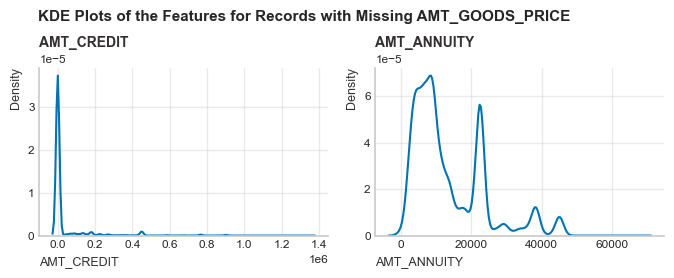

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3))
axes = axes.flatten()
for i, col in enumerate(["AMT_CREDIT", "AMT_ANNUITY"]):
    sns.kdeplot(goods_price_null[col], ax=axes[i])
    axes[i].set_title(col)
fig.suptitle(
    "KDE Plots of the Features for Records with Missing AMT_GOODS_PRICE", x=0.46, y=0.92
)
plt.tight_layout()
plt.show();

We remember that approved revolving loans are the only approved loans that have missing goods price feature. From the plots above we see that majority of the loans with missing goods price have zero credit and annuity amounts, and were refused or canceled. We can also notice that the smallest proportion of consumer loans have goods price missing values. So we will create missingness indicator for this column, but leave the missing values as they are.

In [85]:
prev_applic_overview["AMT_GOODS_PRICE_MISSING"] = (
    prev_applic_overview["AMT_GOODS_PRICE"].isna().astype(int)
)

Further, we will analyze interest rate features and their missingness patterns.

In [86]:
print(
    f"""Number of samples where RATE_INTEREST_PRIMARY has missingness not 
related to RATE_INTEREST_PRIVILEGED is: {(prev_applic_overview[prev_applic_overview[
'RATE_INTEREST_PRIMARY'].isnull()].index != prev_applic_overview[prev_applic_overview
['RATE_INTEREST_PRIVILEGED'].isnull()].index).sum()}"""
)

Number of samples where RATE_INTEREST_PRIMARY has missingness not 
related to RATE_INTEREST_PRIVILEGED is: 0


We see that all samples that have missing RATE_INTEREST_PRIMARY have missing RATE_INTEREST_PRIVILEGED.

In [87]:
prev_applic_overview[prev_applic_overview["RATE_INTEREST_PRIMARY"].isnull()][
    ["RATE_INTEREST_PRIMARY", "RATE_INTEREST_PRIVILEGED"]
].head()

,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN


In [88]:
rate_interest_null = prev_applic_overview[
    prev_applic_overview["RATE_INTEREST_PRIMARY"].isnull()
]

In [89]:
rate_interest_null.NAME_CONTRACT_STATUS.value_counts(normalize=True).map(
    lambda x: f"{x:.2%}"
)

NAME_CONTRACT_STATUS
Approved        61.94%
Canceled        19.01%
Refused         17.47%
Unused offer     1.59%
Name: proportion, dtype: object

In [90]:
rate_interest_null.NAME_CONTRACT_TYPE.value_counts(normalize=True).map(
    lambda x: f"{x:.2%}"
)

NAME_CONTRACT_TYPE
Cash loans         44.92%
Consumer loans     43.45%
Revolving loans    11.61%
XNA                 0.02%
Name: proportion, dtype: object

We can notice that interest rates are mainly missing for approved cash and consumer loans, since maybe those loans have fixed interest rates. However, only ~12% of revolving loans have missing interest rates. Let's examine which contract types have non-missing interest rates - approved consumer loans are the only ones who have non-missing interest rates as to the numbers below.

In [91]:
rate_interest_exist = prev_applic_overview[
    prev_applic_overview["RATE_INTEREST_PRIMARY"].notnull()
]

rate_interest_exist.NAME_CONTRACT_TYPE.value_counts(normalize=True).map(
    lambda x: f"{x:.2%}"
)

NAME_CONTRACT_TYPE
Consumer loans    100.00%
Name: proportion, dtype: object

In [92]:
rate_interest_exist.NAME_CONTRACT_STATUS.value_counts(normalize=True).map(
    lambda x: f"{x:.2%}"
)

NAME_CONTRACT_STATUS
Approved    100.00%
Name: proportion, dtype: object

Since missingness has patterns, we will just create missingness indicators for those features together with indicator for zero interest rates.

In [93]:
prev_applic_overview["RATE_INTEREST_PRIMARY_MISSING"] = (
    prev_applic_overview["RATE_INTEREST_PRIMARY"].isna().astype(int)
)
prev_applic_overview["RATE_INTEREST_PRIMARY_ZERO"] = (
    prev_applic_overview["RATE_INTEREST_PRIMARY"] == 0
).astype(int)
prev_applic_overview["RATE_INTEREST_PRIVILEGED_MISSING"] = (
    prev_applic_overview["RATE_INTEREST_PRIVILEGED"].isna().astype(int)
)
prev_applic_overview["RATE_INTEREST_PRIVILEGED_ZERO"] = (
    prev_applic_overview["RATE_INTEREST_PRIVILEGED"] == 0
).astype(int)

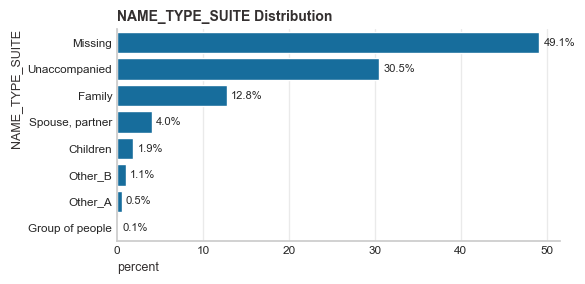

In [94]:
utils.get_countplots(
    prev_applic_overview, ["NAME_TYPE_SUITE"], figsize=(6, 3), right=0.32
)

~49% of previous applications bring no data about type of suite, ~31% were individual, ~13% were family, and only ~7% were others. Let's examine patterns of missingness in this categorical feature.

In [95]:
type_suite_null = prev_applic_overview[prev_applic_overview["NAME_TYPE_SUITE"].isnull()]
type_suite_null.NAME_CONTRACT_STATUS.value_counts(normalize=True).map(
    lambda x: f"{x:.2%}"
)

NAME_CONTRACT_STATUS
Approved        45.40%
Canceled        37.34%
Refused         14.72%
Unused offer     2.54%
Name: proportion, dtype: object

In [96]:
type_suite_null.NAME_CONTRACT_TYPE.value_counts(normalize=True).map(
    lambda x: f"{x:.2%}"
)

NAME_CONTRACT_TYPE
Cash loans         51.37%
Consumer loans     31.85%
Revolving loans    16.74%
XNA                 0.04%
Name: proportion, dtype: object

~45% of approved previous applications have missing values for this feature, ~52% of cash loans have missing values. So revolving loans and refused or unused offers tend to have this feature not missing. We will fill missing values with 'Unknown' category.

In [97]:
prev_applic_overview["NAME_TYPE_SUITE"] = prev_applic_overview[
    "NAME_TYPE_SUITE"
].fillna("Unknown")

Next we will analyze CNT_PAYMENTS feature and its missingness patterns.

In [98]:
cnt_payment_null = prev_applic_overview[prev_applic_overview.CNT_PAYMENT.isnull()]
cnt_payment_null.NAME_CONTRACT_STATUS.value_counts(normalize=True).map(
    lambda x: f"{x:.2%}"
)

NAME_CONTRACT_STATUS
Canceled        82.15%
Refused         10.99%
Unused offer     6.86%
Approved         0.00%
Name: proportion, dtype: object

~82% of canceled previous applications have missing values for CNT_PAYMENT feature. ~77% of cash loans have missing values. So missingness seems to be meaningful here as well.
We see that no approved loans have missing count payment feature. So we will create missingness indicator for this feature together with indicator for zero count payment values.

In [99]:
cnt_payment_null.NAME_CONTRACT_TYPE.value_counts(normalize=True).map(
    lambda x: f"{x:.2%}"
)

NAME_CONTRACT_TYPE
Cash loans         76.83%
Revolving loans    12.94%
Consumer loans     10.13%
XNA                 0.09%
Name: proportion, dtype: object

In [100]:
prev_applic_overview[
    prev_applic_overview.CNT_PAYMENT == 0
].NAME_CONTRACT_STATUS.value_counts(normalize=True).map(lambda x: f"{x:.2%}")

NAME_CONTRACT_STATUS
Approved        67.44%
Refused         32.24%
Canceled         0.33%
Unused offer     0.00%
Name: proportion, dtype: object

In [101]:
prev_applic_overview["CNT_PAYMENT_MISSING"] = (
    prev_applic_overview["CNT_PAYMENT"].isna().astype(int)
)
prev_applic_overview["CNT_PAYMENT_ZERO"] = (
    prev_applic_overview["CNT_PAYMENT"] == 0
).astype(int)

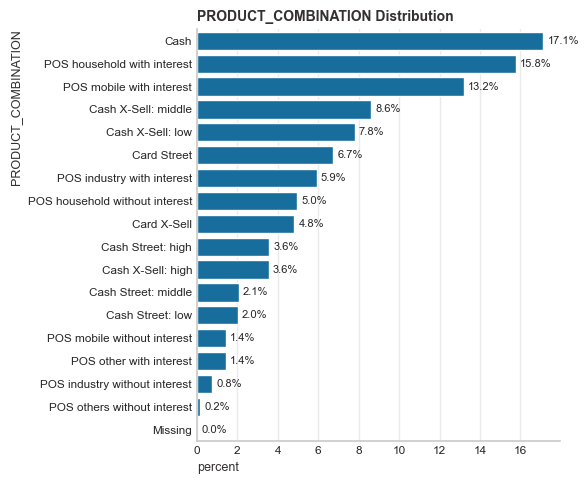

In [102]:
utils.get_countplots(
    prev_applic_overview, ["PRODUCT_COMBINATION"], figsize=(6, 5), right=0.32
)

17% of loans are base cash loans, ~40% are POS loans with interest. We can see that this feature has only a small portion of missing values and also needs to be aggregated to broader categories.

In [103]:
product_comb_null = prev_applic_overview[
    prev_applic_overview["PRODUCT_COMBINATION"].isnull()
]
product_comb_null.NAME_CONTRACT_STATUS.value_counts(normalize=True, dropna=False).map(
    lambda x: f"{x:.2%}"
)

NAME_CONTRACT_STATUS
Canceled    91.04%
Refused      8.96%
Name: proportion, dtype: object

In [104]:
product_comb_null.NAME_CONTRACT_TYPE.value_counts(normalize=True, dropna=False).map(
    lambda x: f"{x:.2%}"
)

NAME_CONTRACT_TYPE
XNA    100.00%
Name: proportion, dtype: object

We can notice that only canceled and refused previous applications of unknown type are missing. So we will create missingness indicator for this feature, fill missing values with 'Unknown' category, and aggregate it to broader categories.

In [105]:
prev_applic_overview["PRODUCT_GROUP_MISSING"] = (
    prev_applic_overview["PRODUCT_COMBINATION"].isna().astype(int)
)
prev_applic_overview["PRODUCT_COMBINATION_GROUP"] = utils.group_product_groups(
    prev_applic_overview["PRODUCT_COMBINATION"]
)
prev_applic_overview = prev_applic_overview.drop(columns=["PRODUCT_COMBINATION"])

Further, we will explore if days related features are missing systematically, i.e. if some features are missing together.

In [106]:
day_cols = [
    "DAYS_FIRST_DRAWING",
    "DAYS_FIRST_DUE",
    "DAYS_LAST_DUE_1ST_VERSION",
    "DAYS_LAST_DUE",
    "DAYS_TERMINATION",
]

prev_applic_overview[day_cols].isna().nunique(axis=1).eq(1).all()

True

We see that days related features are missing for the same applications. So examining patterns of missingness for one of those features is enough.

In [107]:
days_null = prev_applic_overview[prev_applic_overview.DAYS_FIRST_DRAWING.isnull()]
days_null.NAME_CONTRACT_STATUS.value_counts(normalize=True, dropna=False).map(
    lambda x: f"{x:.2%}"
)

NAME_CONTRACT_STATUS
Canceled        47.00%
Refused         43.19%
Approved         5.89%
Unused offer     3.93%
Name: proportion, dtype: object

In [108]:
days_null.NAME_CONTRACT_TYPE.value_counts(normalize=True, dropna=False).map(
    lambda x: f"{x:.2%}"
)

NAME_CONTRACT_TYPE
Cash loans         68.16%
Consumer loans     17.02%
Revolving loans    14.77%
XNA                 0.05%
Name: proportion, dtype: object

Mainly canceled and refused previous applications have missing days related features. ~68% of cash loans have those features missing. We will check which loans have those features not missing.

In [109]:
days_exist = prev_applic_overview[prev_applic_overview["DAYS_FIRST_DRAWING"].notnull()]
days_exist.NAME_CONTRACT_TYPE.value_counts(normalize=True, dropna=False).map(
    lambda x: f"{x:.2%}"
)

NAME_CONTRACT_TYPE
Consumer loans     61.64%
Cash loans         28.96%
Revolving loans     9.40%
Name: proportion, dtype: object

In [110]:
days_exist.NAME_CONTRACT_STATUS.value_counts(normalize=True, dropna=False).map(
    lambda x: f"{x:.2%}"
)

NAME_CONTRACT_STATUS
Approved    100.00%
Name: proportion, dtype: object

We see that days related features exist for approved contracts, mainly consumer loans (~62%). Days are mainly missing for refused and canceled cash loans. Since this missingness is systematic, we will leave those missing values as they are.

##### **Exploring Distributions** #####

Next we will explore distributions of the features to understand their characteristics and spot any anomalies.

In [111]:
prev_applic_overview[day_cols].describe()

,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
count,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838
std,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729
min,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000
25%,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000
50%,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000
75%,365243.000000,-411.000000,129.000000,-74.000000,-44.000000
max,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000


We see that all days related features have anomalies of 365243 value, which seems to be a placeholder for missing values. We will replace those values with actual missing values. In addition, we will create missingness indicators for those features.

In [112]:
for c in day_cols:
    prev_applic_overview[c] = prev_applic_overview[c].replace({365243: np.nan})
    prev_applic_overview[f"{c}_MISSING"] = prev_applic_overview[c].isna().astype(int)

Now we will explore distributions of days related features.

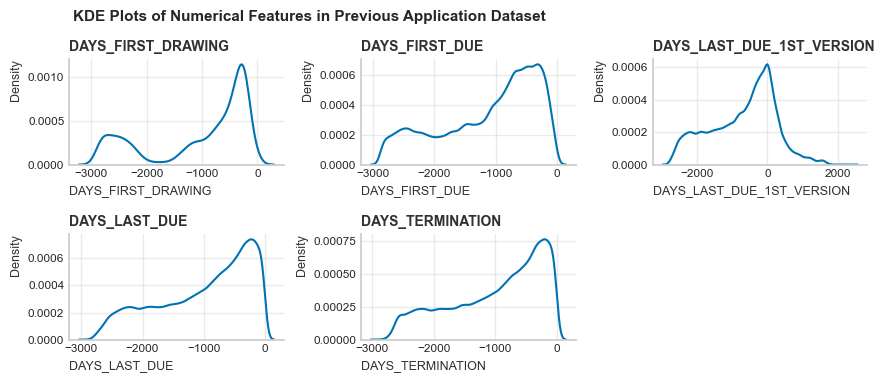

In [113]:
utils.get_kde_plots(prev_applic_overview, day_cols, (9, 4), right=0.36, top=0.95)

We can see that after handling erroneous values, most days related features have a very similar distribution and a range of values. Just DAYS_LAST_DUE_1ST_VERSION has a different distribution, with a peak around 0. Let's explore values that are greater than 2k days for this feature.

In [114]:
prev_applic_overview[prev_applic_overview["DAYS_LAST_DUE_1ST_VERSION"] > 2000]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,...,CNT_PAYMENT,NAME_YIELD_GROUP,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,AMT_ANNUITY_MISSING,AMT_DOWN_PAYMENT_MISSING,RATE_DOWN_PAYMENT_MISSING,AMT_GOODS_PRICE_MISSING,RATE_INTEREST_PRIMARY_MISSING,RATE_INTEREST_PRIMARY_ZERO,RATE_INTEREST_PRIVILEGED_MISSING,RATE_INTEREST_PRIVILEGED_ZERO,CNT_PAYMENT_MISSING,CNT_PAYMENT_ZERO,PRODUCT_GROUP_MISSING,PRODUCT_COMBINATION_GROUP,DAYS_FIRST_DRAWING_MISSING,DAYS_FIRST_DUE_MISSING,DAYS_LAST_DUE_1ST_VERSION_MISSING,DAYS_LAST_DUE_MISSING,DAYS_TERMINATION_MISSING
645393,1044486,333042,Cash loans,29807.370,904500.0,1062099.0,NaN,904500.0,MONDAY,8,Y,1,NaN,NaN,NaN,XNA,Approved,-70,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,...,72.0,low_normal,NaN,-40.0,2090.0,NaN,NaN,1.0,0,1,1,0,1,0,1,0,0,0,0,Cash,1,0,0,1,1
1207872,2022121,155833,Cash loans,18943.605,675000.0,675000.0,NaN,675000.0,SATURDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-128,XNA,XAP,Unaccompanied,Refreshed,XNA,Cash,x-sell,...,72.0,low_normal,NaN,-98.0,2032.0,NaN,NaN,0.0,0,1,1,0,1,0,1,0,0,0,0,Cash,1,0,0,1,1
1224503,1118666,190218,Cash loans,29696.265,1102500.0,1102500.0,NaN,1102500.0,WEDNESDAY,13,Y,1,NaN,NaN,NaN,XNA,Approved,-62,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,...,72.0,low_normal,NaN,-32.0,2098.0,NaN,NaN,0.0,0,1,1,0,1,0,1,0,0,0,0,Cash,1,0,0,1,1
1350567,1768214,204637,Cash loans,42358.095,1341000.0,1574658.0,NaN,1341000.0,THURSDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-149,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,...,72.0,low_normal,NaN,-119.0,2011.0,-29.0,-27.0,1.0,0,1,1,0,1,0,1,0,0,0,0,Cash,1,0,0,0,0
1363511,2416673,284461,Cash loans,15872.715,445987.8,445987.8,NaN,445987.8,THURSDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-131,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,...,84.0,middle,NaN,-101.0,2389.0,NaN,NaN,0.0,0,1,1,0,1,0,1,0,0,0,0,Cash,1,0,0,1,1
1655228,1389938,176258,Cash loans,24356.610,697500.0,863226.0,NaN,697500.0,SATURDAY,10,Y,1,NaN,NaN,NaN,XNA,Approved,-144,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,...,72.0,low_normal,NaN,-114.0,2016.0,NaN,NaN,1.0,0,1,1,0,1,0,1,0,0,0,0,Cash,1,0,0,1,1


We see that CNT_PAYMENT for applications with DAYS_LAST_DUE_1ST_VERSION are over 70 and loans will be repayed in more than 6 years. So it seems that those loans are long-term loans. We will leave those values as they might be valid.

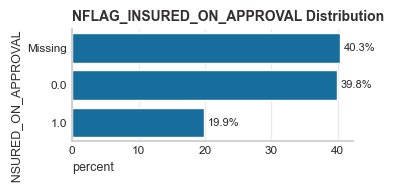

In [115]:
utils.get_countplots(
    prev_applic_overview, ["NFLAG_INSURED_ON_APPROVAL"], figsize=(4, 2), right=0.32
)

Only ~20% of previous applications were requested to be insured by the client. Below we can see that ~31% of cash loan and only ~14% of consumer loans were insured. So we will create missingness indicator for insurance feature and impute missing values with zero, assuming that missingness means that no insurance was requested.

In [116]:
prev_applic_overview.groupby(
    "NAME_CONTRACT_TYPE"
).NFLAG_INSURED_ON_APPROVAL.value_counts(normalize=True, dropna=False).map(
    lambda x: f"{x:.2%}"
)

NAME_CONTRACT_TYPE  NFLAG_INSURED_ON_APPROVAL
Cash loans          NaN                           61.37%
                    1.0                           30.94%
                    0.0                            7.69%
Consumer loans      0.0                           70.61%
                    NaN                           15.71%
                    1.0                           13.68%
Revolving loans     NaN                           51.46%
                    0.0                           48.22%
                    1.0                            0.31%
XNA                 NaN                          100.00%
Name: proportion, dtype: object

In [117]:
prev_applic_overview["NFLAG_INSURED_ON_APPROVAL_MISSING"] = (
    prev_applic_overview["NFLAG_INSURED_ON_APPROVAL"].isna().astype(int)
)

prev_applic_overview["NFLAG_INSURED_ON_APPROVAL"] = prev_applic_overview[
    "NFLAG_INSURED_ON_APPROVAL"
].fillna(0)

Next we will explore distributions of amount and count related features.

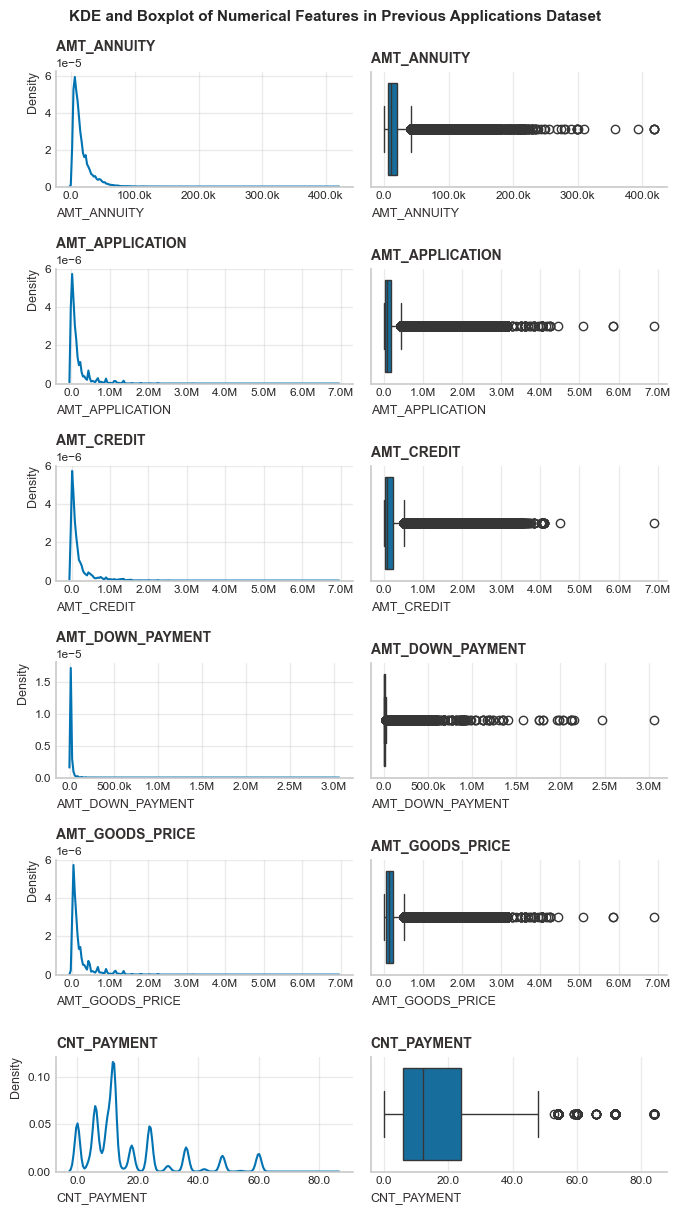

Missing Value Summary:
AMT_ANNUITY: 372235 missing
AMT_APPLICATION: 0 missing
AMT_CREDIT: 0 missing
AMT_DOWN_PAYMENT: 895843 missing
AMT_GOODS_PRICE: 385514 missing
CNT_PAYMENT: 372230 missing


,count,mean,std,min,25%,50%,75%,max
AMT_ANNUITY,"1,297,978.0","15,955.1","14,782.1",0.0,"6,321.8","11,250.0","20,658.4","418,058.1"
AMT_APPLICATION,"1,670,213.0","175,234.0","292,779.8",0.0,"18,720.0","71,046.0","180,360.0","6,905,160.0"
AMT_CREDIT,"1,670,213.0","196,114.0","318,574.6",0.0,"24,160.5","80,541.0","216,418.5","6,905,160.0"
AMT_DOWN_PAYMENT,"774,370.0","6,697.4","20,921.5",-0.9,0.0,"1,638.0","7,740.0","3,060,045.0"
AMT_GOODS_PRICE,"1,284,699.0","227,847.3","315,396.6",0.0,"50,841.0","112,320.0","234,000.0","6,905,160.0"
CNT_PAYMENT,"1,297,983.0",16.1,14.6,0.0,6.0,12.0,24.0,84.0


In [118]:
amt_cols = [
    col
    for col in prev_applic_overview.columns
    if (col.startswith("AMT_") or col.startswith("CNT_"))
    and ("MISSING" not in col and "ZERO" not in col)
]
utils.get_distribution_plots_with_stat(
    prev_applic_overview, amt_cols, right=0.5, top=1.01, name="Previous Applications"
)

We see some extreme values for these features, so we will cap them to the 99.9th percentile to limit their impact on the analysis.

In [119]:
prev_applic_overview = utils.winsorize_features(
    prev_applic_overview, amt_cols, upper=0.999
)

Next we will analyze distributions of rate related features.

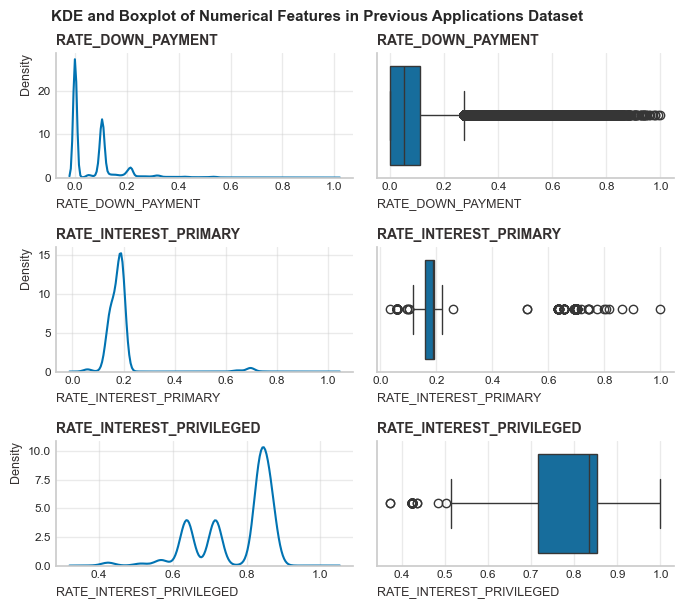

Missing Value Summary:
RATE_DOWN_PAYMENT: 895843 missing
RATE_INTEREST_PRIMARY: 1664262 missing
RATE_INTEREST_PRIVILEGED: 1664262 missing


,count,mean,std,min,25%,50%,75%,max
RATE_DOWN_PAYMENT,"774,370.0",0.1,0.1,-0.0,0.0,0.1,0.1,1.0
RATE_INTEREST_PRIMARY,"5,951.0",0.2,0.1,0.0,0.2,0.2,0.2,1.0
RATE_INTEREST_PRIVILEGED,"5,951.0",0.8,0.1,0.4,0.7,0.8,0.9,1.0


In [120]:
rate_cols = [
    col
    for col in prev_applic_overview.columns
    if col.startswith("RATE_") and ("MISSING" not in col and "ZERO" not in col)
]
utils.get_distribution_plots_with_stat(
    prev_applic_overview, rate_cols, right=0.465, top=1.01, name="Previous Applications"
)

We see thta RATE_INTEREST_PRIMARY has some extreme values on the upper side, so we will cap it to the 99.9th percentile to limit its impact on the analysis.

In [121]:
prev_applic_overview = utils.winsorize_features(
    prev_applic_overview, ["RATE_INTEREST_PRIMARY"], upper=0.999
)

Next, we will investigate distributions of days and hours related features.

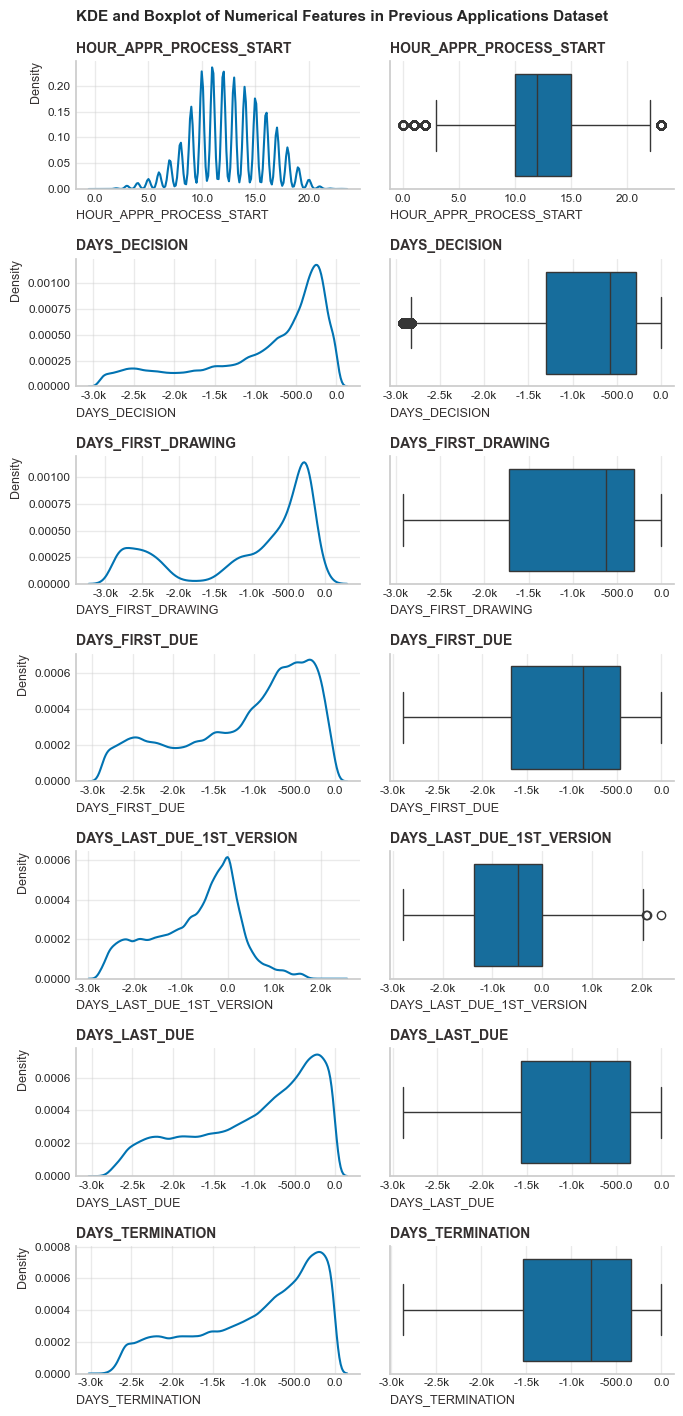

Missing Value Summary:
HOUR_APPR_PROCESS_START: 0 missing
DAYS_DECISION: 0 missing
DAYS_FIRST_DRAWING: 1607508 missing
DAYS_FIRST_DUE: 713709 missing
DAYS_LAST_DUE_1ST_VERSION: 766928 missing
DAYS_LAST_DUE: 884285 missing
DAYS_TERMINATION: 898977 missing


,count,mean,std,min,25%,50%,75%,max
HOUR_APPR_PROCESS_START,"1,670,213.0",12.5,3.3,0.0,10.0,12.0,15.0,23.0
DAYS_DECISION,"1,670,213.0",-880.7,779.1,"-2,922.0","-1,300.0",-581.0,-280.0,-1.0
DAYS_FIRST_DRAWING,"62,705.0","-1,035.2",922.7,"-2,922.0","-1,721.0",-621.0,-303.0,-2.0
DAYS_FIRST_DUE,"956,504.0","-1,106.6",790.7,"-2,892.0","-1,676.0",-874.0,-459.0,-2.0
DAYS_LAST_DUE_1ST_VERSION,"903,285.0",-677.2,923.6,"-2,801.0","-1,359.0",-480.0,-2.0,"2,389.0"
DAYS_LAST_DUE,"785,928.0",-996.2,752.7,"-2,889.0","-1,566.0",-801.0,-353.0,-2.0
DAYS_TERMINATION,"771,236.0",-978.4,749.1,"-2,874.0","-1,539.0",-780.0,-337.0,-2.0


In [122]:
days_cols = [
    col
    for col in prev_applic_overview.columns
    if (col.startswith("DAYS_") or col.startswith("HOUR_")) and ("MISSING" not in col)
]
utils.get_distribution_plots_with_stat(
    prev_applic_overview, days_cols, right=0.5, top=1.01, name="Previous Applications"
)

HOUR_APPR_PROCESS_START and DAYS_LAST_DUE_1ST_VERSION features has some outliers, but since we will aggregate them later, we will leave them as they might be valid values.

Finally, we will explore distributions of the rest of the numerical features.

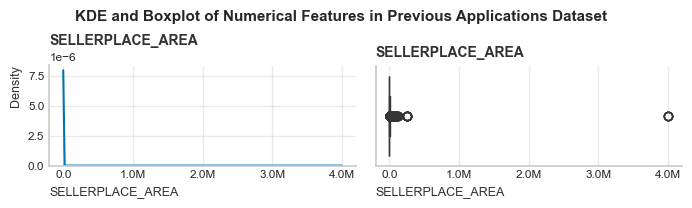

Missing Value Summary:
SELLERPLACE_AREA: 0 missing


,count,mean,std,min,25%,50%,75%,max
SELLERPLACE_AREA,"1,670,213.0",314.0,"7,127.4",-1.0,-1.0,3.0,82.0,"4,000,000.0"


In [123]:
other_num_cols = [
    col for col in prev_applic_overview.columns if col.startswith("SELLERPLACE_")
]

utils.get_distribution_plots_with_stat(
    prev_applic_overview,
    other_num_cols,
    right=0.485,
    top=1.03,
    name="Previous Applications",
)

We see that only one record has SELLERPLACE_AREA equal to 4M. We will cap this features values to the 99.9th percentile to avoid negative impact on the analysis.

In [124]:
prev_applic_overview = utils.winsorize_features(
    prev_applic_overview, other_num_cols, upper=0.999
)

Next we will explore cardinality of categorical features. NAME_CASH_LOAN_PURPOSE has 25 distinct values, so we will aggregate them to broader categories.

In [125]:
print(
    f"Cardinality of NAME_CASH_LOAN_PURPOSE: {prev_applic_overview.NAME_CASH_LOAN_PURPOSE.nunique()}"
)
print("Distribution of NAME_CASH_LOAN_PURPOSE:")
prev_applic_overview.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True).map(
    lambda x: f"{x:.2%}"
)

Cardinality of NAME_CASH_LOAN_PURPOSE: 25
Distribution of NAME_CASH_LOAN_PURPOSE:


NAME_CASH_LOAN_PURPOSE
XAP                                 55.24%
XNA                                 40.59%
Repairs                              1.42%
Other                                0.93%
Urgent needs                         0.50%
Buying a used car                    0.17%
Building a house or an annex         0.16%
Everyday expenses                    0.14%
Medicine                             0.13%
Payments on other loans              0.12%
Education                            0.09%
Journey                              0.07%
Purchase of electronic equipment     0.06%
Buying a new car                     0.06%
Wedding / gift / holiday             0.06%
Buying a home                        0.05%
Car repairs                          0.05%
Furniture                            0.04%
Buying a holiday home / land         0.03%
Business development                 0.03%
Gasification / water supply          0.02%
Buying a garage                      0.01%
Hobby                          

In [126]:
purpose_map = {
    "XAP": "Unknown",
    "XNA": "Unknown",
    "Refusal to name the goal": "Unknown",
    "Buying a new car": "Car",
    "Buying a used car": "Car",
    "Car repairs": "Car",
    "Buying a garage": "Car",
    "Building a house or an annex": "Home",
    "Buying a home": "Home",
    "Buying a holiday home / land": "Home",
    "Furniture": "Home",
    "Education": "Education_Health",
    "Medicine": "Education_Health",
    "Everyday expenses": "Everyday_Urgent",
    "Urgent needs": "Everyday_Urgent",
    "Repairs": "Everyday_Urgent",
    "Money for a third person": "Everyday_Urgent",
    "Purchase of electronic equipment": "Electronics",
    "Wedding / gift / holiday": "Other",
    "Payments on other loans": "Other",
    "Business development": "Other",
    "Gasification / water supply": "Other",
    "Hobby": "Other",
    "Other": "Other",
}

prev_applic_overview["CASH_LOAN_PURPOSE_GROUP"] = prev_applic_overview[
    "NAME_CASH_LOAN_PURPOSE"
].map(purpose_map)
prev_applic_overview = prev_applic_overview.drop(columns=["NAME_CASH_LOAN_PURPOSE"])

In [127]:
print(
    f"Cardinality of NAME_GOODS_CATEGORY: {prev_applic_overview.NAME_GOODS_CATEGORY.nunique()}"
)
print("Distribution of NAME_GOODS_CATEGORY:")
prev_applic_overview.NAME_GOODS_CATEGORY.value_counts(normalize=True).map(
    lambda x: f"{x:.2%}"
)

Cardinality of NAME_GOODS_CATEGORY: 28
Distribution of NAME_GOODS_CATEGORY:


NAME_GOODS_CATEGORY
XNA                         56.93%
Mobile                      13.45%
Consumer Electronics         7.28%
Computers                    6.33%
Audio/Video                  5.95%
Furniture                    3.21%
Photo / Cinema Equipment     1.50%
Construction Materials       1.50%
Clothing and Accessories     1.41%
Auto Accessories             0.44%
Jewelry                      0.38%
Homewares                    0.30%
Medical Supplies             0.23%
Vehicles                     0.20%
Sport and Leisure            0.18%
Gardening                    0.16%
Other                        0.15%
Office Appliances            0.14%
Tourism                      0.10%
Medicine                     0.09%
Direct Sales                 0.03%
Fitness                      0.01%
Additional Service           0.01%
Education                    0.01%
Weapon                       0.00%
Insurance                    0.00%
Animals                      0.00%
House Construction           0.00%


Unique values of NAME_CASH_LOAN_PURPOSE feature will be mapped to broader categories as follows:

In [128]:
goods_map = {
    "XNA": "Unknown",
    "Mobile": "Electronics",
    "Consumer Electronics": "Electronics",
    "Computers": "Electronics",
    "Audio/Video": "Electronics",
    "Photo / Cinema Equipment": "Electronics",
    "Office Appliances": "Electronics",
    "Furniture": "Furniture_Home",
    "Homewares": "Furniture_Home",
    "House Construction": "Furniture_Home",
    "Construction Materials": "Furniture_Home",
    "Clothing and Accessories": "Clothing_Accessories",
    "Jewelry": "Clothing_Accessories",
    "Vehicles": "Vehicle_Auto",
    "Auto Accessories": "Vehicle_Auto",
    "Medical Supplies": "Health_Medicine",
    "Medicine": "Health_Medicine",
    "Sport and Leisure": "Sports_Leisure",
    "Fitness": "Sports_Leisure",
    "Gardening": "Gardening",
    "Tourism": "Tourism_Education_Service",
    "Education": "Tourism_Education_Service",
    "Additional Service": "Tourism_Education_Service",
    "Direct Sales": "Tourism_Education_Service",
    "Weapon": "Other",
    "Insurance": "Other",
    "Animals": "Other",
    "Other": "Other",
}

prev_applic_overview["GOODS_CATEGORY_GROUP"] = prev_applic_overview[
    "NAME_GOODS_CATEGORY"
].map(goods_map)
prev_applic_overview = prev_applic_overview.drop(columns=["NAME_GOODS_CATEGORY"])

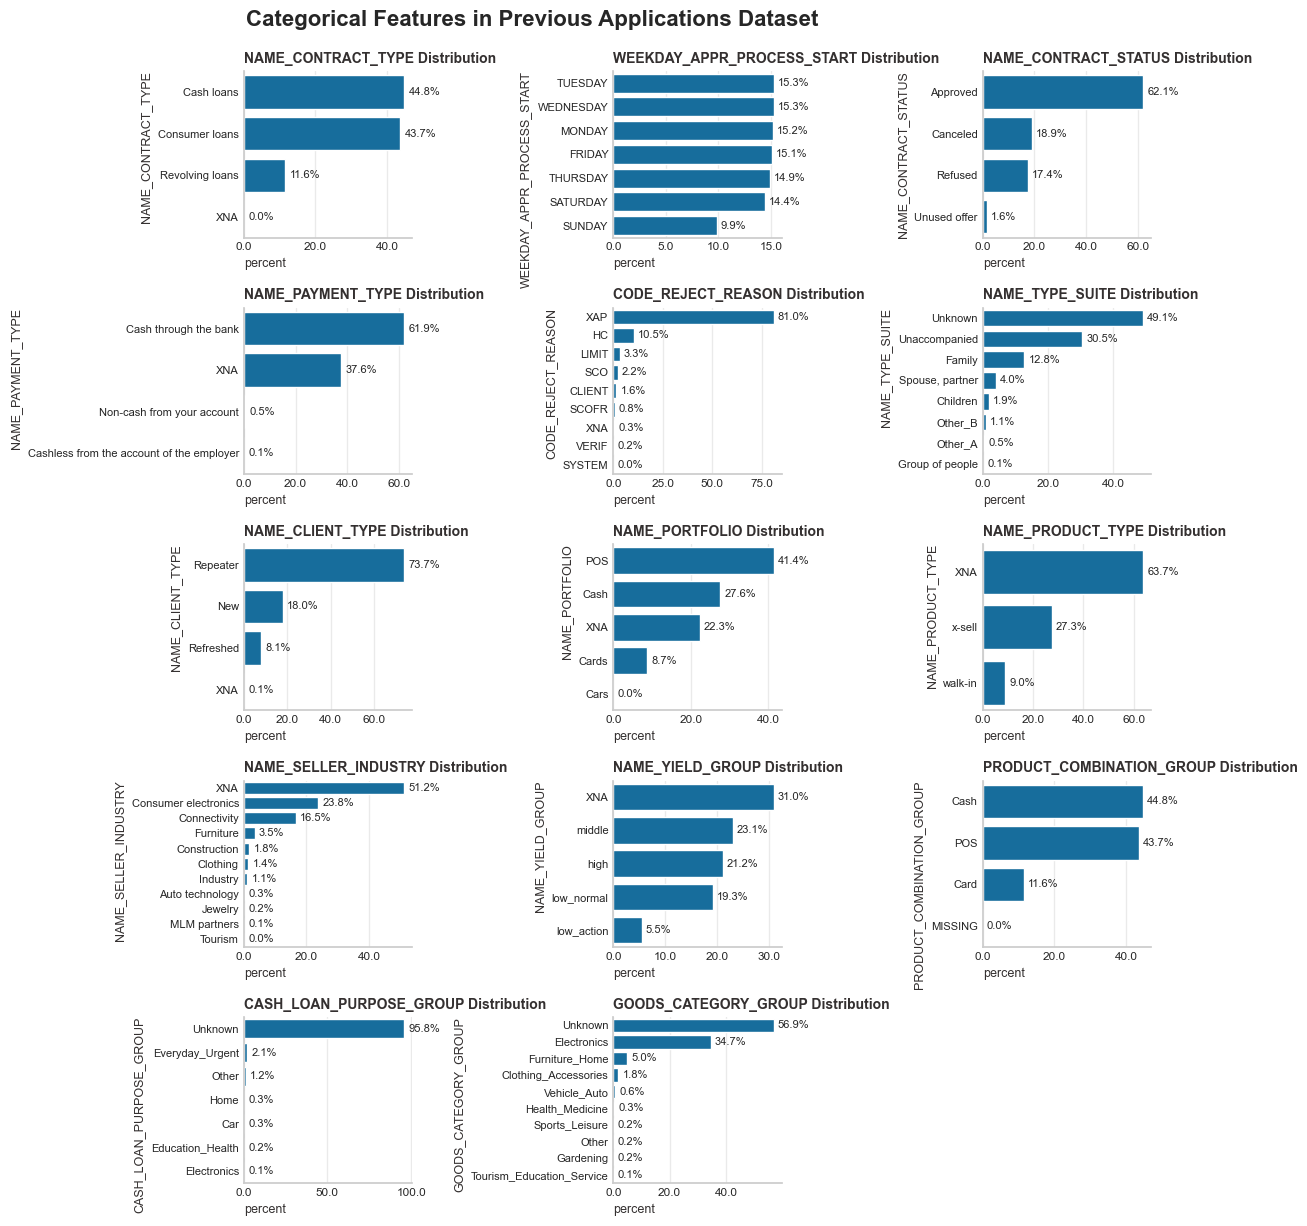

In [129]:
cat_keywords = ["NAME_", "CODE_", "_GROUP", "WEEKDAY_", "TYPE_", "SELLER_"]
categorical_cols = [
    col
    for col in prev_applic_overview.columns
    if any(key in col for key in cat_keywords) and "MISSING" not in col
]
ncols = 3
nrows = len(categorical_cols)
nrows = int(np.ceil(nrows / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 12))
axes = axes.flatten()
for i, col in enumerate(categorical_cols):
    sns.countplot(
        y=prev_applic_overview[col],
        order=prev_applic_overview[col].value_counts().index,
        ax=axes[i],
        stat="percent",
    )
    axes[i].set_title(f"{col} Distribution")
    axes[i].tick_params(axis="y", labelsize=8)
    axes[i].xaxis.set_major_formatter(
        FuncFormatter(partial(utils.format_numbers, count=True))
    )
    for container in axes[i].containers:
        axes[i].bar_label(
            container, fmt="%.1f%%", label_type="edge", padding=3, fontsize=8
        )
for i in range(len(categorical_cols), len(axes)):
    ax = axes[i]
    ax.axis("off")
plt.tight_layout()
fig.suptitle(
    "Categorical Features in Previous Applications Dataset", x=0.45, y=1.02, fontsize=16
)
plt.show();

Finally, we have got a sense of the distributions of the aggregated and original categorical features. We can state that:   
* ~45% of previous applications were cash loans, ~44% were consumer loans, and ~12% were revolving loans.
* only Sundays were less prevalent for application processing, while other days had similar proportions.
* ~62% of previous loans were approved, ~19% were canceled, and ~17% were refused.
* ~62% of payments were cash through the bank, and the rest were unknown or others.
* ~49% of applicants didn't specify their type of suite, ~31% were individual, ~13% were family, and only ~7% were others.
* ~74% of applicants were repeaters and ~18% were new.
* ~41% of portfolios were POS loans, ~28% were cash loans, and the rest were others or unknown.
* ~96% of contracts had unknown cash loan purpose, and ~57% had unknown goods category.
* ~45% of product combinations belonged to cash loan group, ~44% were of POS loan group, and the rest were others or unknown.
* 81% of previous applications were rejected because of XAP reason.

##### **FINAL JOINING AND AGGREGATION** #####

In this section we will join all dataset related to previous applications together and aggregate them to the current application level to prepare for merging with the main application data later on.

In [130]:
print(f"The shapes of related tables are: ")
cash_loan_summary.shape, credit_card_summary.shape, installment_summary.shape, prev_applic_overview.shape

The shapes of related tables are: 


((936325, 22), (104307, 58), (997752, 28), (1670213, 54))

We need to aggregate all four tables by SK_ID_CURR and SK_ID_PREV to prepare them for merging with the main application data.

In [131]:
previous_application_data = con.execute(
    """SELECT
                                            -- Primary IDs from the prev_applic_overview table to avoid duplicates
                                                T1.SK_ID_CURR,
                                                T1.SK_ID_PREV,

                                                -- All columns from prev_applic_overview
                                                T1.NAME_CONTRACT_TYPE,
                                                T1.AMT_ANNUITY,
                                                T1.AMT_APPLICATION,
                                                T1.AMT_CREDIT,
                                                T1.AMT_CREDIT/NULLIF(T1.AMT_APPLICATION, 0) AS LOAN_TO_APP_RATIO,
                                                T1.AMT_GOODS_PRICE/NULLIF(T1.AMT_CREDIT, 0) AS GOODS_TO_CREDIT_RATIO,
                                                T1.AMT_CREDIT - T1.AMT_GOODS_PRICE AS CREDIT_MINUS_GOODS_PRICE,
                                                T1.AMT_DOWN_PAYMENT/NULLIF(T1.AMT_GOODS_PRICE, 0) AS DOWNPAYMENT_TO_GOODS_RATIO,
                                                T1.AMT_DOWN_PAYMENT,
                                                T1.AMT_GOODS_PRICE,
                                                T1.WEEKDAY_APPR_PROCESS_START,
                                                T1.HOUR_APPR_PROCESS_START,
                                                T1.FLAG_LAST_APPL_PER_CONTRACT,
                                                T1.NFLAG_LAST_APPL_IN_DAY,
                                                T1.RATE_DOWN_PAYMENT,
                                                T1.RATE_INTEREST_PRIMARY,
                                                T1.RATE_INTEREST_PRIVILEGED,
                                                T1.NAME_CONTRACT_STATUS,
                                                T1.DAYS_DECISION,
                                                T1.NAME_PAYMENT_TYPE,
                                                T1.CODE_REJECT_REASON,
                                                T1.NAME_TYPE_SUITE,
                                                T1.NAME_CLIENT_TYPE,
                                                T1.NAME_PORTFOLIO,
                                                T1.NAME_PRODUCT_TYPE,
                                                T1.CHANNEL_TYPE,
                                                T1.SELLERPLACE_AREA,
                                                T1.NAME_SELLER_INDUSTRY,
                                                T1.CNT_PAYMENT,
                                                T1.NAME_YIELD_GROUP,
                                                T1.DAYS_FIRST_DRAWING,
                                                T1.DAYS_FIRST_DUE,
                                                T1.DAYS_LAST_DUE_1ST_VERSION,
                                                T1.DAYS_LAST_DUE,
                                                T1.DAYS_LAST_DUE - T1.DAYS_FIRST_DUE AS LAST_DUE_MINUS_FIRST_DUE,
                                                T1.DAYS_TERMINATION - T1.DAYS_DECISION AS TERMINATION_MINUS_DECISION,
                                                T1.DAYS_TERMINATION,
                                                T1.NFLAG_INSURED_ON_APPROVAL,
                                                T1.AMT_ANNUITY_MISSING,
                                                T1.AMT_DOWN_PAYMENT_MISSING,
                                                T1.RATE_DOWN_PAYMENT_MISSING,
                                                T1.AMT_GOODS_PRICE_MISSING,
                                                T1.RATE_INTEREST_PRIMARY_MISSING,
                                                T1.RATE_INTEREST_PRIMARY_ZERO,
                                                T1.RATE_INTEREST_PRIVILEGED_MISSING,
                                                T1.RATE_INTEREST_PRIVILEGED_ZERO,
                                                T1.CNT_PAYMENT_MISSING,
                                                T1.CNT_PAYMENT_ZERO,
                                                T1.PRODUCT_GROUP_MISSING,
                                                T1.PRODUCT_COMBINATION_GROUP,
                                                T1.DAYS_FIRST_DRAWING_MISSING,
                                                T1.DAYS_FIRST_DUE_MISSING,
                                                T1.DAYS_LAST_DUE_1ST_VERSION_MISSING,
                                                T1.DAYS_LAST_DUE_MISSING,
                                                T1.DAYS_TERMINATION_MISSING,
                                                T1.NFLAG_INSURED_ON_APPROVAL_MISSING,
                                                T1.CASH_LOAN_PURPOSE_GROUP,
                                                T1.GOODS_CATEGORY_GROUP,

                                                -- All columns from cash_loan_summary
                                                T2.POS_COUNT_RECORDS,
                                                T2.POS_MOST_RECENT_MONTH,
                                                T2.POS_OLDEST_MONTH,
                                                T2.POS_MONTHS_SPAN,
                                                T2.POS_MAX_DPD,
                                                T2.POS_AVG_DPD,
                                                T2.POS_MAX_DPD_DEF,
                                                T2.POS_AVG_DPD_DEF,
                                                T2.POS_DPD_COUNT,
                                                T2.POS_DPD_RATIO,
                                                T2.POS_MIN_SCHEDULED_INSTALMENT,
                                                T2.POS_MAX_SCHEDULED_INSTALMENT,
                                                T2.POS_AVG_SCHEDULED_INSTALMENT,
                                                T2.POS_MAX_INSTALMENT_PLAN,
                                                T2.POS_AVG_INSTALMENT_PLAN,
                                                T2.POS_MAX_INSTALMENT_PAID,
                                                T2.POS_AVG_FUTURE_RATIO,
                                                T2.POS_ACTIVE_COUNT,
                                                T2.POS_COMPLETED_COUNT,
                                                T2.POS_SIGNED_COUNT,
                                                T2.POS_RATIO_COMPLETED_MONTHS,

                                                -- All columns from installment_summary
                                                T3.LATE_PAYMENT_COUNT,
                                                T3.TOTAL_UNDERPAYMENT,
                                                T3.UNDERPAID_COUNT,
                                                T3.OVERPAID_COUNT,
                                                T3.MAX_PAYMENT_DELAY,
                                                T3.MIN_PAYMENT_DELAY,
                                                T3.AVG_PAYMENT_DELAY,
                                                T3.MAX_PAYMENT_DIFF,
                                                T3.MIN_PAYMENT_DIFF,
                                                T3.AVG_PAYMENT_DIFF,
                                                T3.MOST_RECENT_PAYMENT,
                                                T3.FIRST_PAYMENT,
                                                T3.AVG_PAYMENT_LAG,
                                                T3.MOST_RECENT_INSTALMENT,
                                                T3.FIRST_INSTALMENT,
                                                T3.TOTAL_SCHEDULED_INSTALMENTS,
                                                T3.AVG_DAYS_PAYMENT_DIFF_RATIO,
                                                T3.AVG_PAYMENT_DIFF_RATIO,
                                                T3.AVG_PAYMENT_RISK,
                                                T3.AVG_PAYMENT_DIFF_RATIO_MISSING,
                                                T3.AVG_DAYS_PAYMENT_DIFF_RATIO_MISSING,
                                                T3.AVG_PAYMENT_RISK_MISSING,
                                                T3.MIN_PAYMENT_DELAY_MISSING,
                                                T3.MAX_PAYMENT_DELAY_MISSING,
                                                T3.AVG_PAYMENT_DELAY_MISSING,
                                                T3.FIRST_PAYMENT_MISSING,
                                                T3.MOST_RECENT_PAYMENT_MISSING,

                                                -- All columns from credit_card_summary
                                                T4.CC_MONTHLY_RECORDS,
                                                T4.CC_MOST_RECENT_MONTH,
                                                T4.CC_OLDEST_MONTH,
                                                T4.CC_MONTHS_SPAN,
                                                T4.CC_MAX_DPD,
                                                T4.CC_AVG_DPD,
                                                T4.CC_MAX_DPD_DEF,
                                                T4.CC_AVG_DPD_DEF,
                                                T4.CC_DPD_COUNT,
                                                T4.CC_MAX_BALANCE,
                                                T4.CC_AVG_BALANCE,
                                                T4.CC_STD_BALANCE,
                                                T4.CC_AVG_CREDIT_LIMIT,
                                                T4.CC_MAX_CREDIT_LIMIT,
                                                T4.CC_AVG_UTILIZATION_RATIO,
                                                T4.CC_MAX_UTILIZATION_RATIO,
                                                T4.CC_AVG_DRAWINGS_ATM,
                                                T4.CC_AVG_DRAWINGS,
                                                T4.CC_SUM_DRAWINGS,
                                                T4.CC_MAX_DRAWINGS,
                                                T4.CC_AVG_DRAWINGS_OTHER,
                                                T4.CC_AVG_DRAWINGS_POS,
                                                T4.CC_SUM_UNACCOUNTED_DRAWINGS,
                                                T4.CC_AVG_UNACCOUNTED_DRAWINGS,
                                                T4.CC_AVG_NON_ZERO_DRAWINGS,
                                                T4.CC_SUM_CNT_DRAWINGS_ATM,
                                                T4.CC_SUM_CNT_DRAWINGS,
                                                T4.CC_MAX_CNT_DRAWINGS,
                                                T4.CC_SUM_CNT_DRAWINGS_OTHER,
                                                T4.CC_SUM_CNT_DRAWINGS_POS,
                                                T4.CC_AVG_PAYMENT_CURRENT,
                                                T4.CC_SUM_PAYMENT_CURRENT,
                                                T4.CC_AVG_PAYMENT_TOTAL_CURRENT,
                                                T4.CC_SUM_PAYMENT_TOTAL_CURRENT,
                                                T4.CC_MAX_INSTALMENT_MATURED,
                                                T4.CC_AVG_INSTALMENT_MATURED,
                                                T4.CC_AVG_RECEIVABLE,
                                                T4.CC_MAX_RECEIVABLE,
                                                T4.CC_AVG_RECEIVABLE_PRINCIPAL,
                                                T4.CC_MAX_RECEIVABLE_PRINCIPAL,
                                                T4.CC_STD_RECEIVABLE_PRINCIPAL,
                                                T4.CC_AVG_TOTAL_RECEIVABLE,
                                                T4.CC_MAX_TOTAL_RECEIVABLE,
                                                T4.CC_STD_TOTAL_RECEIVABLE,
                                                T4.CC_MAX_MIN_INSTALMENT,
                                                T4.CC_AVG_MIN_INSTALMENT,
                                                T4.CC_PAYMENT_TO_DRAWINGS_RATIO,
                                                T4.CC_PAYMENT_TO_BALANCE_RATIO,
                                                T4.CC_PAYMENT_TO_MIN_INSTALMENT_RATIO,
                                                T4.CC_ACTIVE_COUNT,
                                                T4.CC_COMPLETED_COUNT,
                                                T4.CC_SIGNED_COUNT,
                                                T4.CC_DEMAND_COUNT,
                                                T4.CC_ACTIVE_RATIO,
                                                T4.CC_COMPLETED_RATIO,
                                                T4.CC_SIGNED_RATIO,
                                                T4.CC_DEMAND_RATIO
                                            FROM
                                                prev_applic_overview AS T1
                                            LEFT JOIN
                                                cash_loan_summary AS T2
                                            ON T1.SK_ID_PREV = T2.SK_ID_PREV
                                            LEFT JOIN
                                                installment_summary AS T3
                                            ON T1.SK_ID_PREV = T3.SK_ID_PREV
                                            LEFT JOIN
                                                credit_card_summary AS T4
                                            ON T1.SK_ID_PREV = T4.SK_ID_PREV"""
).df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [132]:
print(f"The shape of interim table is: {previous_application_data.shape}.")

The shape of interim table is: (1670213, 165).


We can notice that current application has from 1 to 77 previous applications.

In [133]:
previous_application_data.groupby("SK_ID_CURR").size().sort_values(
    ascending=False
).head()

SK_ID_CURR
187868    77
265681    73
173680    72
242412    68
206783    67
dtype: int64

In [134]:
print(
    f"Interim table has missing values for {previous_application_data.isnull().any().sum()} features."
)

Interim table has missing values for 124 features.


Finally, we will aggregate all four tables by SK_ID_CURR to prepare them for merging with the main application data later on.

In [135]:
con.execute('SET memory_limit="16GB"');

In [136]:
final_previous_appl_data = con.execute(
    """SELECT
                                             SK_ID_CURR,
                                             COUNT(DISTINCT SK_ID_PREV) AS NUM_PREV_APPLICATIONS,
                                             AVG(CASE WHEN NAME_CONTRACT_TYPE = 'Cash loans' THEN 1 END) AS CASH_LOANS_RATIO,
                                             AVG(CASE WHEN NAME_CONTRACT_TYPE = 'Consumer loans' THEN 1 END) AS CONSUMER_LOANS_RATIO,
                                             AVG(CASE WHEN NAME_CONTRACT_TYPE = 'Revolving loans' THEN 1 END) AS REVOLVING_LOANS_RATIO,
                                             
                                             AVG(CASE WHEN NAME_CONTRACT_STATUS = 'Approved' THEN 1 END) AS APPROVED_RATIO,
                                             AVG(CASE WHEN NAME_CONTRACT_STATUS = 'Canceled' THEN 1 END) AS CANCELED_RATIO,
                                             AVG(CASE WHEN NAME_CONTRACT_STATUS = 'Refused' THEN 1 END) AS REFUSED_RATIO,
                                             AVG(CASE WHEN NAME_CONTRACT_STATUS = 'Unused offer' THEN 1 END) AS UNUSED_OFFER_RATIO,
                                             
                                             AVG(AMT_ANNUITY) AS AVG_AMT_ANNUITY,
                                             SUM(AMT_ANNUITY) AS SUM_AMT_ANNUITY,
                                             STDDEV(AMT_ANNUITY) AS STDDEV_AMT_ANNUITY,
                                             
                                             MAX(LOAN_TO_APP_RATIO) AS MAX_LOAN_TO_APP_RATIO,
                                             AVG(LOAN_TO_APP_RATIO) AS AVG_LOAN_TO_APP_RATIO,
                                             STDDEV(LOAN_TO_APP_RATIO) AS STDDEV_LOAN_TO_APP_RATIO,
                                             
                                             MAX(GOODS_TO_CREDIT_RATIO) AS MAX_GOODS_TO_CREDIT_RATIO,
                                             AVG(GOODS_TO_CREDIT_RATIO) AS AVG_GOODS_TO_CREDIT_RATIO,
                                             STDDEV(GOODS_TO_CREDIT_RATIO) AS STDDEV_GOODS_TO_CREDIT_RATIO,
                                             AVG(CREDIT_MINUS_GOODS_PRICE) AS AVG_CREDIT_MINUS_GOODS_PRICE,
                                             MAX(DOWNPAYMENT_TO_GOODS_RATIO) AS MAX_DOWNPAYMENT_TO_GOODS_RATIO,
                                             AVG(DOWNPAYMENT_TO_GOODS_RATIO) AS AVG_DOWNPAYMENT_TO_GOODS_RATIO,
                                             STDDEV(DOWNPAYMENT_TO_GOODS_RATIO) AS STDDEV_DOWNPAYMENT_TO_GOODS_RATIO,
                                             
                                             AVG(AMT_APPLICATION) AS AVG_AMT_APPLICATION,
                                             SUM(AMT_APPLICATION) AS SUM_AMT_APPLICATION,
                                             STDDEV(AMT_APPLICATION) AS STDDEV_AMT_APPLICATION,
                                             
                                             AVG(AMT_CREDIT) AS AVG_AMT_CREDIT,
                                             SUM(AMT_CREDIT) AS SUM_AMT_CREDIT,
                                             STDDEV(AMT_CREDIT) AS STDDEV_AMT_CREDIT,
                                             
                                             SUM(AMT_CREDIT)/ NULLIF(SUM(AMT_APPLICATION), 0) AS AVG_TOTAL_CREDIT_TO_APPLICATION_RATIO,
                                             SUM(AMT_CREDIT)/ NULLIF(SUM(AMT_GOODS_PRICE), 0) AS AVG_TOTAL_CREDIT_TO_GOODS_RATIO,
                                             SUM(AMT_ANNUITY)/ NULLIF(SUM(AMT_CREDIT), 0) AS AVG_TOTAL_ANNUITY_TO_CREDIT_RATIO,
                                                                                        
                                             AVG(AMT_DOWN_PAYMENT) AS AVG_AMT_DOWN_PAYMENT,
                                             SUM(AMT_DOWN_PAYMENT)/ NULLIF(SUM(AMT_GOODS_PRICE), 0) AS AVG_TOTAL_DOWNPAYMENT_TO_GOODS_RATIO,
                                             STDDEV(AMT_DOWN_PAYMENT) AS STDDEV_AMT_DOWN_PAYMENT,
                                             
                                             AVG(AMT_GOODS_PRICE) AS AVG_AMT_GOODS_PRICE,
                                             STDDEV(AMT_GOODS_PRICE) AS STDDEV_AMT_GOODS_PRICE,
                                             
                                             MODE(WEEKDAY_APPR_PROCESS_START) AS MODE_WEEKDAY_APPR_PROCESS_START,
                                             AVG(HOUR_APPR_PROCESS_START) AS AVG_HOUR_APPR_PROCESS_START,
                                             MODE(FLAG_LAST_APPL_PER_CONTRACT) AS MODE_FLAG_LAST_APPL_PER_CONTRACT,
                                             AVG(NFLAG_LAST_APPL_IN_DAY) AS AVG_NFLAG_LAST_APPL_IN_DAY,
                                             AVG(RATE_DOWN_PAYMENT) AS AVG_RATE_DOWN_PAYMENT,
                                             AVG(RATE_INTEREST_PRIMARY) AS AVG_RATE_INTEREST_PRIMARY,
                                             AVG(RATE_INTEREST_PRIVILEGED) AS AVG_RATE_INTEREST_PRIVILEGED,
                                             MODE(CASH_LOAN_PURPOSE_GROUP) AS MODE_CASH_LOAN_PURPOSE_GROUP,
                                             COUNT(DISTINCT CASH_LOAN_PURPOSE_GROUP) AS NUM_UNIQUE_CASH_LOAN_PURPOSES,
                                             
                                             MODE(NAME_CONTRACT_STATUS) AS MODE_NAME_CONTRACT_STATUS,
                                             COUNT(DISTINCT NAME_CONTRACT_STATUS) AS NUM_UNIQUE_CONTRACT_STATUSES,
                                             
                                             AVG(DAYS_DECISION) AS AVG_DAYS_DECISION,
                                             MIN(ABS(DAYS_DECISION)) AS MIN_ABS_DAYS_DECISION,
                                             
                                             MODE(NAME_PAYMENT_TYPE) AS MODE_NAME_PAYMENT_TYPE,
                                             COUNT(DISTINCT NAME_PAYMENT_TYPE) AS NUM_UNIQUE_PAYMENT_TYPES,
                                             
                                             MODE(CODE_REJECT_REASON) AS MODE_CODE_REJECT_REASON,
                                             COUNT(DISTINCT CODE_REJECT_REASON) AS NUM_UNIQUE_REJECT_REASONS,
                                             
                                             MODE(NAME_TYPE_SUITE) AS MODE_NAME_TYPE_SUITE,
                                             MODE(NAME_CLIENT_TYPE) AS MODE_NAME_CLIENT_TYPE,
                                             COUNT(DISTINCT NAME_CLIENT_TYPE) AS NUM_UNIQUE_CLIENT_TYPES,
                                             
                                             MODE(GOODS_CATEGORY_GROUP) AS MODE_GOODS_CATEGORY_GROUP,
                                             COUNT(DISTINCT GOODS_CATEGORY_GROUP) AS NUM_UNIQUE_GOODS_CATEGORIES,
                                             
                                             MODE(NAME_PORTFOLIO) AS MODE_NAME_PORTFOLIO,
                                             COUNT(DISTINCT NAME_PORTFOLIO) AS NUM_UNIQUE_PORTFOLIOS,
                                             
                                             MODE(NAME_PRODUCT_TYPE) AS MODE_NAME_PRODUCT_TYPE,
                                             COUNT(DISTINCT NAME_PRODUCT_TYPE) AS NUM_UNIQUE_PRODUCT_TYPES,
                                             
                                             MODE(CHANNEL_TYPE) AS MODE_CHANNEL_TYPE,
                                             COUNT(DISTINCT CHANNEL_TYPE) AS NUM_UNIQUE_CHANNEL_TYPES,
                                             
                                             MODE(SELLERPLACE_AREA) AS MODE_SELLERPLACE_AREA,
                                             MODE(NAME_SELLER_INDUSTRY) AS MODE_NAME_SELLER_INDUSTRY,
                                             COUNT(DISTINCT NAME_SELLER_INDUSTRY) AS NUM_UNIQUE_SELLER_INDUSTRIES,
                                             
                                             SUM(CNT_PAYMENT) AS SUM_CNT_PAYMENT,
                                             MODE(NAME_YIELD_GROUP) AS MODE_NAME_YIELD_GROUP,
                                             COUNT(DISTINCT NAME_YIELD_GROUP) AS NUM_UNIQUE_YIELD_GROUPS,
                                             
                                             MODE(PRODUCT_COMBINATION_GROUP) AS MODE_PRODUCT_COMBINATION_GROUP,
                                             COUNT(DISTINCT PRODUCT_COMBINATION_GROUP) AS NUM_UNIQUE_PRODUCT_COMBINATIONS,
                                             
                                             AVG(DAYS_FIRST_DRAWING) AS AVG_DAYS_FIRST_DRAWING,
                                             STDDEV(DAYS_FIRST_DRAWING) AS STDDEV_DAYS_FIRST_DRAWING,
                                             
                                             AVG(DAYS_FIRST_DUE) AS AVG_DAYS_FIRST_DUE,
                                             STDDEV(DAYS_FIRST_DUE) AS STDDEV_DAYS_FIRST_DUE,
                                             
                                             AVG(DAYS_LAST_DUE_1ST_VERSION) AS AVG_DAYS_LAST_DUE_1ST_VERSION,
                                             STDDEV(DAYS_LAST_DUE_1ST_VERSION) AS STDDEV_DAYS_LAST_DUE_1ST_VERSION,
                                             
                                             AVG(DAYS_LAST_DUE) AS AVG_DAYS_LAST_DUE,
                                             STDDEV(DAYS_LAST_DUE) AS STDDEV_DAYS_LAST_DUE,
                                             
                                             AVG(LAST_DUE_MINUS_FIRST_DUE) AS AVG_LAST_DUE_MINUS_FIRST_DUE,
                                             AVG(TERMINATION_MINUS_DECISION) AS AVG_TERMINATION_MINUS_DECISION,
                                             STDDEV(TERMINATION_MINUS_DECISION) AS STDDEV_TERMINATION_MINUS_DECISION,
                                             
                                             AVG(DAYS_TERMINATION) AS AVG_DAYS_TERMINATION,
                                             AVG(NFLAG_INSURED_ON_APPROVAL) AS AVG_NFLAG_INSURED_ON_APPROVAL,
                                             
                                             AVG(AMT_ANNUITY_MISSING) AS AVG_AMT_ANNUITY_MISSING,
                                             AVG(AMT_DOWN_PAYMENT_MISSING) AS AVG_AMT_DOWN_PAYMENT_MISSING,
                                             AVG(RATE_DOWN_PAYMENT_MISSING) AS AVG_RATE_DOWN_PAYMENT_MISSING,
                                             AVG(AMT_GOODS_PRICE_MISSING) AS AVG_AMT_GOODS_PRICE_MISSING,
                                             
                                             
                                             AVG(RATE_INTEREST_PRIMARY_MISSING) AS AVG_RATE_INTEREST_PRIMARY_MISSING,
                                             AVG(RATE_INTEREST_PRIMARY_ZERO) AS AVG_RATE_INTEREST_PRIMARY_ZERO,
                                             AVG(RATE_INTEREST_PRIVILEGED_MISSING) AS AVG_RATE_INTEREST_PRIVILEGED_MISSING,
                                             AVG(RATE_INTEREST_PRIVILEGED_ZERO) AS AVG_RATE_INTEREST_PRIVILEGED_ZERO,
                                             AVG(CNT_PAYMENT_MISSING) AS AVG_CNT_PAYMENT_MISSING,
                                             AVG(CNT_PAYMENT_ZERO) AS AVG_CNT_PAYMENT_ZERO,
                                             AVG(PRODUCT_GROUP_MISSING) AS AVG_PRODUCT_GROUP_MISSING,
                                             
                                             AVG(DAYS_FIRST_DRAWING_MISSING) AS AVG_DAYS_FIRST_DRAWING_MISSING,
                                             AVG(DAYS_FIRST_DUE_MISSING) AS AVG_DAYS_FIRST_DUE_MISSING,
                                             AVG(DAYS_LAST_DUE_1ST_VERSION_MISSING) AS AVG_DAYS_LAST_DUE_1ST_VERSION_MISSING,
                                             AVG(DAYS_LAST_DUE_MISSING) AS AVG_DAYS_LAST_DUE_MISSING,
                                             AVG(DAYS_TERMINATION_MISSING) AS AVG_DAYS_TERMINATION_MISSING,
                                             AVG(NFLAG_INSURED_ON_APPROVAL_MISSING) AS AVG_NFLAG_INSURED_ON_APPROVAL_MISSING,
                                             
                                             SUM(POS_COUNT_RECORDS) AS SUM_POS_COUNT,
                                             AVG(POS_MOST_RECENT_MONTH) AS AVG_POS_MOST_RECENT_MONTH,
                                             AVG(POS_OLDEST_MONTH) AS AVG_POS_OLDEST_MONTH,
                                             AVG(POS_MONTHS_SPAN) AS AVG_POS_MONTHS_SPAN,
                                             AVG(POS_MAX_DPD) AS AVG_POS_MAX_DPD,
                                             MAX(POS_MAX_DPD) AS MAX_POS_MAX_DPD,
                                             AVG(POS_AVG_DPD) AS AVG_POS_AVG_DPD,
                                             MAX(POS_AVG_DPD) AS MAX_POS_AVG_DPD,
                                             AVG(POS_MAX_DPD_DEF) AS AVG_POS_MAX_DPD_DEF,
                                             MAX(POS_MAX_DPD_DEF) AS MAX_POS_MAX_DPD_DEF,
                                             AVG(POS_AVG_DPD_DEF) AS AVG_POS_AVG_DPD_DEF,
                                             MAX(POS_AVG_DPD_DEF) AS MAX_POS_AVG_DPD_DEF,
                                             SUM(POS_DPD_COUNT) AS SUM_POS_DPD_COUNT,
                                             MAX(POS_DPD_RATIO) AS MAX_POS_DPD_RATIO,
                                             
                                             
                                             AVG(POS_MAX_SCHEDULED_INSTALMENT) AS AVG_POS_MAX_SCHEDULED_INSTALMENT,
                                             AVG(POS_MIN_SCHEDULED_INSTALMENT) AS AVG_POS_MIN_SCHEDULED_INSTALMENT,
                                             AVG(POS_AVG_SCHEDULED_INSTALMENT) AS AVG_POS_AVG_SCHEDULED_INSTALMENT,
                                             SUM(POS_MAX_INSTALMENT_PLAN) AS SUM_POS_MAX_SCHEDULED_INSTALMENT,
                                             SUM(POS_AVG_INSTALMENT_PLAN) AS SUM_POS_AVG_SCHEDULED_INSTALMENT,
                                             SUM(POS_MAX_INSTALMENT_PAID) AS SUM_POS_MAX_INSTALMENT_PAID,
                                             AVG(POS_AVG_FUTURE_RATIO) AS AVG_POS_AVG_FUTURE_RATIO,
                                             MAX(POS_AVG_FUTURE_RATIO) AS MAX_POS_AVG_FUTURE_RATIO,
                                             
                                             SUM(POS_ACTIVE_COUNT) AS SUM_POS_ACTIVE_COUNT,
                                             SUM(POS_COMPLETED_COUNT) AS SUM_POS_COMPLETED_COUNT,
                                             SUM(POS_SIGNED_COUNT) AS SUM_POS_SIGNED_COUNT,
                                             AVG(POS_RATIO_COMPLETED_MONTHS) AS AVG_POS_RATIO_COMPLETED_MONTHS,

                                             -- t3 columns
                                             SUM(LATE_PAYMENT_COUNT) AS SUM_LATE_PAYMENT_COUNT,
                                             AVG(TOTAL_UNDERPAYMENT) AS AVG_TOTAL_UNDERPAYMENT,
                                             MAX(TOTAL_UNDERPAYMENT) AS MAX_TOTAL_UNDERPAYMENT,
                                             STDDEV(TOTAL_UNDERPAYMENT) AS STDDEV_TOTAL_UNDERPAYMENT,
                                             
                                             SUM(UNDERPAID_COUNT) AS SUM_UNDERPAID_COUNT,
                                             SUM(OVERPAID_COUNT) AS SUM_OVERPAID_COUNT,
                                             
                                             AVG(MAX_PAYMENT_DELAY) AS AVG_MAX_PAYMENT_DELAY,
                                             AVG(MIN_PAYMENT_DELAY) AS AVG_MIN_PAYMENT_DELAY,
                                             AVG(AVG_PAYMENT_DELAY) AS AVG_AVG_PAYMENT_DELAY,
                                             AVG(AVG_PAYMENT_DIFF) AS AVG_AVG_PAYMENT_DIFF,
                                             AVG(MAX_PAYMENT_DIFF) AS AVG_MAX_PAYMENT_DIFF,
                                             AVG(MIN_PAYMENT_DIFF) AS AVG_MIN_PAYMENT_DIFF,
                                             
                                             AVG(AVG_PAYMENT_LAG) AS AVG_AVG_PAYMENT_LAG,
                                             STDDEV(AVG_PAYMENT_LAG) AS STDDEV_AVG_PAYMENT_LAG,
                                             MAX(AVG_PAYMENT_LAG) AS MAX_AVG_PAYMENT_LAG,
                                             MIN(AVG_PAYMENT_LAG) AS MIN_AVG_PAYMENT_LAG,
                                             AVG(MOST_RECENT_PAYMENT) AS AVG_MOST_RECENT_PAYMENT,
                                             MIN(ABS(MOST_RECENT_PAYMENT)) AS MIN_ABS_MOST_RECENT_PAYMENT,
                                             AVG(TOTAL_SCHEDULED_INSTALMENTS) AS AVG_TOTAL_SCHEDULED_INSTALMENTS,
                                             SUM(TOTAL_SCHEDULED_INSTALMENTS) AS SUM_TOTAL_SCHEDULED_INSTALMENTS,
                                             AVG(FIRST_PAYMENT) AS AVG_FIRST_PAYMENT,
                                             AVG(MOST_RECENT_INSTALMENT) AS AVG_MOST_RECENT_INSTALMENT,
                                             AVG(FIRST_INSTALMENT) AS AVG_FIRST_INSTALMENT,
                                             AVG(AVG_DAYS_PAYMENT_DIFF_RATIO) AS AVG_AVG_DAYS_PAYMENT_DIFF_RATIO,
                                             AVG(AVG_PAYMENT_DIFF_RATIO) AS AVG_AVG_PAYMENT_DIFF_RATIO,
                                             AVG(AVG_PAYMENT_RISK) AS AVG_AVG_PAYMENT_RISK,
                                             AVG(AVG_PAYMENT_DIFF_RATIO_MISSING) AS AVG_AVG_PAYMENT_DIFF_RATIO_MISSING,
                                             AVG(AVG_DAYS_PAYMENT_DIFF_RATIO_MISSING) AS AVG_AVG_DAYS_PAYMENT_DIFF_RATIO_MISSING,
                                             AVG(AVG_PAYMENT_RISK_MISSING) AS AVG_AVG_PAYMENT_RISK_MISSING,
                                             AVG(MIN_PAYMENT_DELAY_MISSING) AS AVG_MIN_PAYMENT_DELAY_MISSING,
                                             AVG(MAX_PAYMENT_DELAY_MISSING) AS AVG_MAX_PAYMENT_DELAY_MISSING,
                                             AVG(AVG_PAYMENT_DELAY_MISSING) AS AVG_AVG_PAYMENT_DELAY_MISSING,
                                             AVG(FIRST_PAYMENT_MISSING) AS AVG_FIRST_PAYMENT_MISSING,
                                             AVG(MOST_RECENT_PAYMENT_MISSING) AS AVG_MOST_RECENT_PAYMENT_MISSING,
                                             
                                             -- t4 columns
                                             SUM(CC_MONTHLY_RECORDS) AS SUM_CC_MONTHLY_RECORDS,
                                             AVG(CC_MOST_RECENT_MONTH) AS AVG_CC_MOST_RECENT_MONTH,
                                             AVG(CC_OLDEST_MONTH) AS AVG_CC_OLDEST_MONTH,
                                             AVG(CC_MONTHS_SPAN) AS AVG_CC_MONTHS_SPAN,
                                             AVG(CC_MAX_DPD) AS AVG_CC_MAX_DPD,
                                             AVG(CC_AVG_DPD) AS AVG_CC_AVG_DPD,
                                             AVG(CC_MAX_DPD_DEF) AS AVG_CC_MAX_DPD_DEF,
                                             AVG(CC_AVG_DPD_DEF) AS AVG_CC_AVG_DPD_DEF,
                                             SUM(CC_DPD_COUNT) AS SUM_CC_DPD_COUNT,
                                             
                                             AVG(CC_MAX_BALANCE) AS AVG_CC_MAX_BALANCE,
                                             AVG(CC_AVG_BALANCE) AS AVG_CC_AVG_BALANCE,
                                             AVG(CC_STD_BALANCE) AS AVG_CC_STD_BALANCE,
                                             
                                             
                                             AVG(CC_AVG_CREDIT_LIMIT) AS AVG_CC_AVG_CREDIT_LIMIT,
                                             STDDEV(CC_AVG_CREDIT_LIMIT) AS STDDEV_CC_AVG_CREDIT_LIMIT,
                                             
                                             AVG(CC_MAX_CREDIT_LIMIT) AS AVG_CC_MAX_CREDIT_LIMIT,
                                             STDDEV(CC_MAX_CREDIT_LIMIT) AS STDDEV_CC_MAX_CREDIT_LIMIT,
                                             
                                             MAX(CC_AVG_UTILIZATION_RATIO) AS MAX_CC_AVG_UTILIZATION_RATIO,
                                             STDDEV(CC_AVG_UTILIZATION_RATIO) AS STDDEV_CC_AVG_UTILIZATION_RATIO,
                                             
                                             MAX(CC_MAX_UTILIZATION_RATIO) AS MAX_CC_MAX_UTILIZATION_RATIO,
                                             STDDEV(CC_MAX_UTILIZATION_RATIO) AS STDDEV_CC_MAX_UTILIZATION_RATIO,
                                             
                                             AVG(CC_AVG_DRAWINGS_ATM) AS AVG_CC_AVG_DRAWINGS_ATM,
                                             AVG(CC_AVG_DRAWINGS) AS AVG_CC_AVG_DRAWINGS,
                                             AVG(CC_SUM_DRAWINGS) AS AVG_CC_SUM_DRAWINGS,
                                             AVG(CC_MAX_DRAWINGS) AS AVG_CC_MAX_DRAWINGS,
                                             AVG(CC_AVG_DRAWINGS_OTHER) AS AVG_CC_AVG_DRAWINGS_OTHER,
                                             AVG(CC_AVG_DRAWINGS_POS) AS AVG_CC_AVG_DRAWINGS_POS,
                                             
                                             
                                             AVG(CC_SUM_UNACCOUNTED_DRAWINGS) AS AVG_CC_SUM_UNACCOUNTED_DRAWINGS,
                                             AVG(CC_AVG_UNACCOUNTED_DRAWINGS) AS AVG_CC_AVG_UNACCOUNTED_DRAWINGS,
                                             AVG(CC_AVG_NON_ZERO_DRAWINGS) AS AVG_CC_AVG_NON_ZERO_DRAWINGS,
                                             
                                             SUM(CC_SUM_CNT_DRAWINGS_ATM) AS SUM_CC_SUM_CNT_DRAWINGS_ATM,
                                             SUM(CC_SUM_CNT_DRAWINGS) AS SUM_CC_SUM_CNT_DRAWINGS,
                                             AVG(CC_MAX_CNT_DRAWINGS) AS AVG_CC_MAX_CNT_DRAWINGS,
                                             SUM(CC_SUM_CNT_DRAWINGS_OTHER) AS SUM_CC_SUM_CNT_DRAWINGS_OTHER,
                                             SUM(CC_SUM_CNT_DRAWINGS_POS) AS SUM_CC_SUM_CNT_DRAWINGS_POS,
                                             AVG(CC_AVG_PAYMENT_CURRENT) AS AVG_CC_AVG_PAYMENT_CURRENT,
                                             AVG(CC_SUM_PAYMENT_CURRENT) AS AVG_CC_SUM_PAYMENT_CURRENT,
                                             AVG(CC_AVG_PAYMENT_TOTAL_CURRENT) AS AVG_CC_AVG_PAYMENT_TOTAL_CURRENT,
                                             AVG(CC_SUM_PAYMENT_TOTAL_CURRENT) AS AVG_CC_SUM_PAYMENT_TOTAL_CURRENT,
                                             AVG(CC_MAX_INSTALMENT_MATURED) AS AVG_CC_MAX_INSTALMENT_MATURED,
                                             AVG(CC_AVG_INSTALMENT_MATURED) AS AVG_CC_AVG_INSTALMENT_MATURED,
                                             
                                             AVG(CC_AVG_RECEIVABLE) AS AVG_CC_AVG_RECEIVABLE,
                                             AVG(CC_MAX_RECEIVABLE) AS AVG_CC_MAX_RECEIVABLE,
                                             AVG(CC_AVG_RECEIVABLE_PRINCIPAL) AS AVG_CC_AVG_RECEIVABLE_PRINCIPAL,
                                             AVG(CC_MAX_RECEIVABLE_PRINCIPAL) AS AVG_CC_MAX_RECEIVABLE_PRINCIPAL,
                                             AVG(CC_STD_RECEIVABLE_PRINCIPAL) AS AVG_CC_STD_RECEIVABLE_PRINCIPAL,
                                             
                                             AVG(CC_AVG_TOTAL_RECEIVABLE) AS AVG_CC_AVG_TOTAL_RECEIVABLE,
                                             AVG(CC_MAX_TOTAL_RECEIVABLE) AS AVG_CC_MAX_TOTAL_RECEIVABLE,
                                             AVG(CC_STD_TOTAL_RECEIVABLE) AS AVG_CC_STD_TOTAL_RECEIVABLE,
                                             
                                             AVG(CC_MAX_MIN_INSTALMENT) AS AVG_CC_MAX_MIN_INSTALMENT,
                                             AVG(CC_AVG_MIN_INSTALMENT) AS AVG_CC_AVG_MIN_INSTALMENT,
                                             MAX(CC_PAYMENT_TO_DRAWINGS_RATIO) AS MAX_CC_PAYMENT_TO_DRAWINGS_RATIO,
                                             STDDEV(CC_PAYMENT_TO_DRAWINGS_RATIO) AS STDDEV_CC_PAYMENT_TO_DRAWINGS_RATIO,
                                             
                                             MAX(CC_PAYMENT_TO_BALANCE_RATIO) AS MAX_CC_PAYMENT_TO_BALANCE_RATIO,
                                             STDDEV(CC_PAYMENT_TO_BALANCE_RATIO) AS STDDEV_CC_PAYMENT_TO_BALANCE_RATIO,
                                             
                                             MAX(CC_PAYMENT_TO_MIN_INSTALMENT_RATIO) AS MAX_CC_PAYMENT_TO_MIN_INSTALMENT_RATIO,
                                             STDDEV(CC_PAYMENT_TO_MIN_INSTALMENT_RATIO) AS STDDEV_CC_PAYMENT_TO_MIN_INSTALMENT_RATIO,
                                             
                                             SUM(CC_ACTIVE_COUNT) AS SUM_CC_ACTIVE_COUNT,
                                             SUM(CC_COMPLETED_COUNT) AS SUM_CC_COMPLETED_COUNT,
                                             SUM(CC_SIGNED_COUNT) AS SUM_CC_SIGNED_COUNT,
                                             SUM(CC_DEMAND_COUNT) AS SUM_CC_DEMAND_COUNT,                                             
                                             
                                             MAX(CC_ACTIVE_RATIO) AS MAX_CC_ACTIVE_RATIO,
                                             MAX(CC_COMPLETED_RATIO) AS MAX_CC_COMPLETED_RATIO,
                                             STDDEV(CC_COMPLETED_RATIO) AS STDDEV_CC_COMPLETED_RATIO,
                                             
                                             MAX(CC_SIGNED_RATIO) AS MAX_CC_SIGNED_RATIO,
                                             MAX(CC_DEMAND_RATIO) AS MAX_CC_DEMAND_RATIO
                                               
                                        FROM previous_application_data
                                        GROUP BY SK_ID_CURR;"""
).df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [137]:
print(f"Final table has the shape: {final_previous_appl_data.shape}.")

Final table has the shape: (338857, 227).


In [138]:
print(
    "Each current application has the following distribution of previous applications:"
)
final_previous_appl_data.groupby("SK_ID_CURR").size().value_counts()

Each current application has the following distribution of previous applications:


1    338857
Name: count, dtype: int64

We now have achieved that each current application has a single record with aggregated features from all four previous applications datasets. This will allow us to merge this data with the main application data for further analysis and modeling.

In [139]:
print(
    f"Final table has {final_previous_appl_data.isnull().any().sum()} features with missing values."
)

Final table has 172 features with missing values.


Finally, we will save the aggregated previous applications data to a Parquet file for further analysis and modeling.

In [140]:
prev_applic_path = "../data/processed/prev_appl_table_v3.parquet"
# final_previous_appl_data.to_parquet(prev_applic_path, index=False)
print(f"Dataframe saved to {prev_applic_path}.")

Dataframe saved to ../data/processed/prev_appl_table_v3.parquet.
